In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#from dmba import regressionSummary
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('train.csv',index_col=0)

# Exploratory data analysis 

In [25]:
#obtain the shape of the dataset
df.shape

(1460, 80)

In [26]:
#obtain basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
#review the first five rows of the dataset
with pd.option_context('display.max_columns', None):
  display (df.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [28]:
#obtain the basic information of the target variable (SalePrice)
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Handle Missing Value
Because the data is small, the team try to impute the missing value other than removing them.

In [29]:
#look for missing values
df1 = df.isnull().sum()
df1[df1 != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [30]:
# fill median value for missing value in LotFrontage column
df['LotFrontage'] = df['LotFrontage'] .fillna(value=df['LotFrontage'].median())

# fill'No_Alley' for missing values in Alley column
df['Alley'] = df['Alley'].fillna('No_Alley')

# fill 'No_Basement' for missing value in BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')

# fill 'No_Basement' for missing value in BsmtQual column
df['BsmtQual'] = df['BsmtQual'].fillna('No_Basement')

# fill 'No_Basement' for missing value in BsmtCond column
df['BsmtCond'] = df['BsmtCond'].fillna('No_Basement')

In [31]:
# BsmtExposure has one more missing value than BsmtQual and No_Basement.
# Based on the exploration below, the addtional missing value indicates that the basement is not finished yet.
# The team decide use the most frequen to fill that addtional missing value and fill'No_Basement'  to the rest.

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtExposure'].isnull()])
df.loc[949,'BsmtExposure']=df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_Basement')
df.BsmtExposure.value_counts()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
Id                                                                          
18            90       RL         72.0    10791   Pave  No_Alley      Reg   
40            90       RL         65.0     6040   Pave  No_Alley      Reg   
91            20       RL         60.0     7200   Pave  No_Alley      Reg   
103           90       RL         64.0     7018   Pave  No_Alley      Reg   
157           20       RL         60.0     7200   Pave  No_Alley      Reg   
183           20       RL         60.0     9060   Pave  No_Alley      Reg   
260           20       RM         70.0    12702   Pave  No_Alley      Reg   
343           90       RL         69.0     8544   Pave  No_Alley      Reg   
363           85       RL         64.0     7301   Pave  No_Alley      Reg   
372           50       RL         80.0    17120   Pave  No_Alley      Reg   
393           20       RL         69.0     8339   Pave  No_Alley      IR1   
521          190       RL         60.0    10800   Pave      Grvl      Reg   
533           20       RL         60.0     7200   Pave  No_Alley      Reg   
534           20       RL         50.0     5000   Pave  No_Alley      Reg   
554           20       RL         67.0     8777   Pave  No_Alley      Reg   
647           20       RL         60.0     7200   Pave  No_Alley      Reg   
706          190       RM         70.0     5600   Pave  No_Alley      Reg   
737           90       RL         60.0     8544   Pave  No_Alley      Reg   
750           50       RL         50.0     8405   Pave  No_Alley      Reg   
779           90       RH         60.0     8400   Pave  No_Alley      Reg   
869           60       RL         69.0    14762   Pave  No_Alley      IR2   
895           90       RL         64.0     7018   Pave  No_Alley      Reg   
898           90       RL         64.0     7018   Pave  No_Alley      Reg   
949           60       RL         65.0    14006   Pave  No_Alley      IR1   
985           90       RL         75.0    10125   Pave  No_Alley      Reg   
1001          20       RL         74.0    10206   Pave  No_Alley      Reg   
1012          90       RL         75.0     9825   Pave  No_Alley      Reg   
1036          20       RL         69.0    11500   Pave  No_Alley      IR1   
1046          20       RL         69.0    13680   Pave  No_Alley      IR1   
1049          20       RL        100.0    21750   Pave  No_Alley      Reg   
1050          20       RL         60.0    11100   Pave  No_Alley      Reg   
1091          90       RL         60.0     8544   Pave  No_Alley      Reg   
1180          20       RL         77.0     8335   Pave  No_Alley      Reg   
1217          90       RM         68.0     8930   Pave  No_Alley      Reg   
1219          50       RM         52.0     6240   Pave  No_Alley      Reg   
1233          90       RL         70.0     9842   Pave  No_Alley      Reg   
1322          20       RL         69.0     6627   Pave  No_Alley      IR1   
1413          90       RL         60.0     7200   Pave  No_Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
18           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
40           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
91           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
103          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
157          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
183          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
260          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
343          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
363          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
372          Lvl    AllPub    Inside       Gtl      ClearCr      Feedr   
393          Lvl    AllPub    Inside 

No             954
Av             221
Gd             134
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [32]:
# fill 'No_Basement' for missing value in BsmtFinType1 column
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')

In [33]:
# BsmtFinType2 has one more missing value than BsmtQual, No_Basement, and BsmtFinType1.
# Based on the exploration below, the addtional missing value indicates that the basement area (if multiple types) 
#is not finished yet. The team decide to assign Unifnshed (Unf) to fill this addtional missing value 
# and fill 'No_Basement' to the rest

with pd.option_context('display.max_columns', None):
  display (df[df['BsmtFinType2'].isnull()])

df.loc[333,'BsmtFinType2']='Unf'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df.BsmtFinType2.value_counts()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
Id                                                                          
18            90       RL         72.0    10791   Pave  No_Alley      Reg   
40            90       RL         65.0     6040   Pave  No_Alley      Reg   
91            20       RL         60.0     7200   Pave  No_Alley      Reg   
103           90       RL         64.0     7018   Pave  No_Alley      Reg   
157           20       RL         60.0     7200   Pave  No_Alley      Reg   
183           20       RL         60.0     9060   Pave  No_Alley      Reg   
260           20       RM         70.0    12702   Pave  No_Alley      Reg   
333           20       RL         85.0    10655   Pave  No_Alley      IR1   
343           90       RL         69.0     8544   Pave  No_Alley      Reg   
363           85       RL         64.0     7301   Pave  No_Alley      Reg   
372           50       RL         80.0    17120   Pave  No_Alley      Reg   
393           20       RL         69.0     8339   Pave  No_Alley      IR1   
521          190       RL         60.0    10800   Pave      Grvl      Reg   
533           20       RL         60.0     7200   Pave  No_Alley      Reg   
534           20       RL         50.0     5000   Pave  No_Alley      Reg   
554           20       RL         67.0     8777   Pave  No_Alley      Reg   
647           20       RL         60.0     7200   Pave  No_Alley      Reg   
706          190       RM         70.0     5600   Pave  No_Alley      Reg   
737           90       RL         60.0     8544   Pave  No_Alley      Reg   
750           50       RL         50.0     8405   Pave  No_Alley      Reg   
779           90       RH         60.0     8400   Pave  No_Alley      Reg   
869           60       RL         69.0    14762   Pave  No_Alley      IR2   
895           90       RL         64.0     7018   Pave  No_Alley      Reg   
898           90       RL         64.0     7018   Pave  No_Alley      Reg   
985           90       RL         75.0    10125   Pave  No_Alley      Reg   
1001          20       RL         74.0    10206   Pave  No_Alley      Reg   
1012          90       RL         75.0     9825   Pave  No_Alley      Reg   
1036          20       RL         69.0    11500   Pave  No_Alley      IR1   
1046          20       RL         69.0    13680   Pave  No_Alley      IR1   
1049          20       RL        100.0    21750   Pave  No_Alley      Reg   
1050          20       RL         60.0    11100   Pave  No_Alley      Reg   
1091          90       RL         60.0     8544   Pave  No_Alley      Reg   
1180          20       RL         77.0     8335   Pave  No_Alley      Reg   
1217          90       RM         68.0     8930   Pave  No_Alley      Reg   
1219          50       RM         52.0     6240   Pave  No_Alley      Reg   
1233          90       RL         70.0     9842   Pave  No_Alley      Reg   
1322          20       RL         69.0     6627   Pave  No_Alley      IR1   
1413          90       RL         60.0     7200   Pave  No_Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
18           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
40           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
91           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
103          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
157          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
183          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
260          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
333          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
343          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
363          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
372          Lvl    AllPub    Inside 

Unf            1257
Rec              54
LwQ              46
No_Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [34]:
# fill 'No_Fireplace' for missing value in  FireplaceQu column
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')

# fill 'No_Garage' for missing value in GarageType column
df['GarageType'] = df['GarageType'].fillna('No_Garage')

# fill 'No_Garage' for missing value in GarageFinish column
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')

# fill 'No_Garage' for missing value in GarageQual column
df['GarageQual'] = df['GarageQual'].fillna('No_Garage')

# fill 'No_Garage' for missing value in  GarageCond column
df['GarageCond'] = df['GarageCond'].fillna('No_Garage')

# fill 'No_Pool' for missing value in PoolQC column
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')

# fill 'No_Fence' for missing value in Fence column
df['Fence'] = df['Fence'].fillna('No_Fence')

# fill 'No_MiscFeature' for missing value in MiscFeature column
df['MiscFeature'] = df['MiscFeature'].fillna('No_MiscFeature')

# fill the most frequent category for missing value in Electrical column
df['Electrical'] = df['Electrical'].fillna(value=df['Electrical'].mode()[0])

# fill the most frequent category for missing value in MasVnrType column
df['MasVnrType'] = df['MasVnrType'].fillna(value=df['MasVnrType'].mode()[0])

# fill 0 for missing value in MasVnrArea column
df['MasVnrArea'] = df['MasVnrArea'] .fillna(value=0)

# fill 0 for missing value in GarageYrBlt column
df['GarageYrBlt'] = df['GarageYrBlt'] .fillna(value=0)

In [35]:
# recheck whether any missing value
df2 = df.isnull().sum()
df2[df2 != 0]

Series([], dtype: int64)

# Handle any duplciate row

In [36]:
# Do not find duplciate row
df_dup=df.duplicated()
df_dup[df_dup]

Series([], dtype: bool)

# Preprocess the data type for further anlysis

In [37]:
# due to the nature and data description, the team decides to conver MSSubClass to category data type
df.MSSubClass=df.MSSubClass.astype('category')

# Analyze target variable and relationship between variables

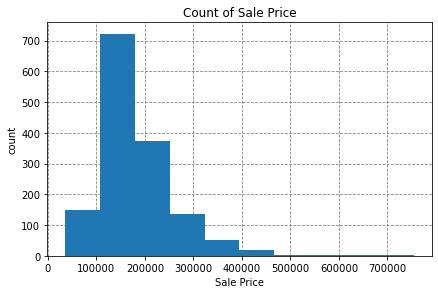

In [38]:
# Genearte the histgram for target variable 
fig, ax = plt.subplots()
ax.hist(df.SalePrice)
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

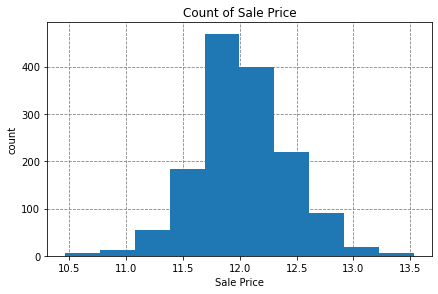

In [39]:
fig, ax = plt.subplots()
ax.hist(np.log(df.SalePrice))
ax.set_axisbelow(True) 
ax.grid(which='major', color='grey', linestyle='--')
plt.title('Count of Sale Price')
plt.tight_layout()
ax.set_xlabel('Sale Price')
ax.set_ylabel('count')
plt.show()

Based on the above histogram, the team found that the distribution of saleprice is positive shewness. if using log tranformation, it is a normail distrubition.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


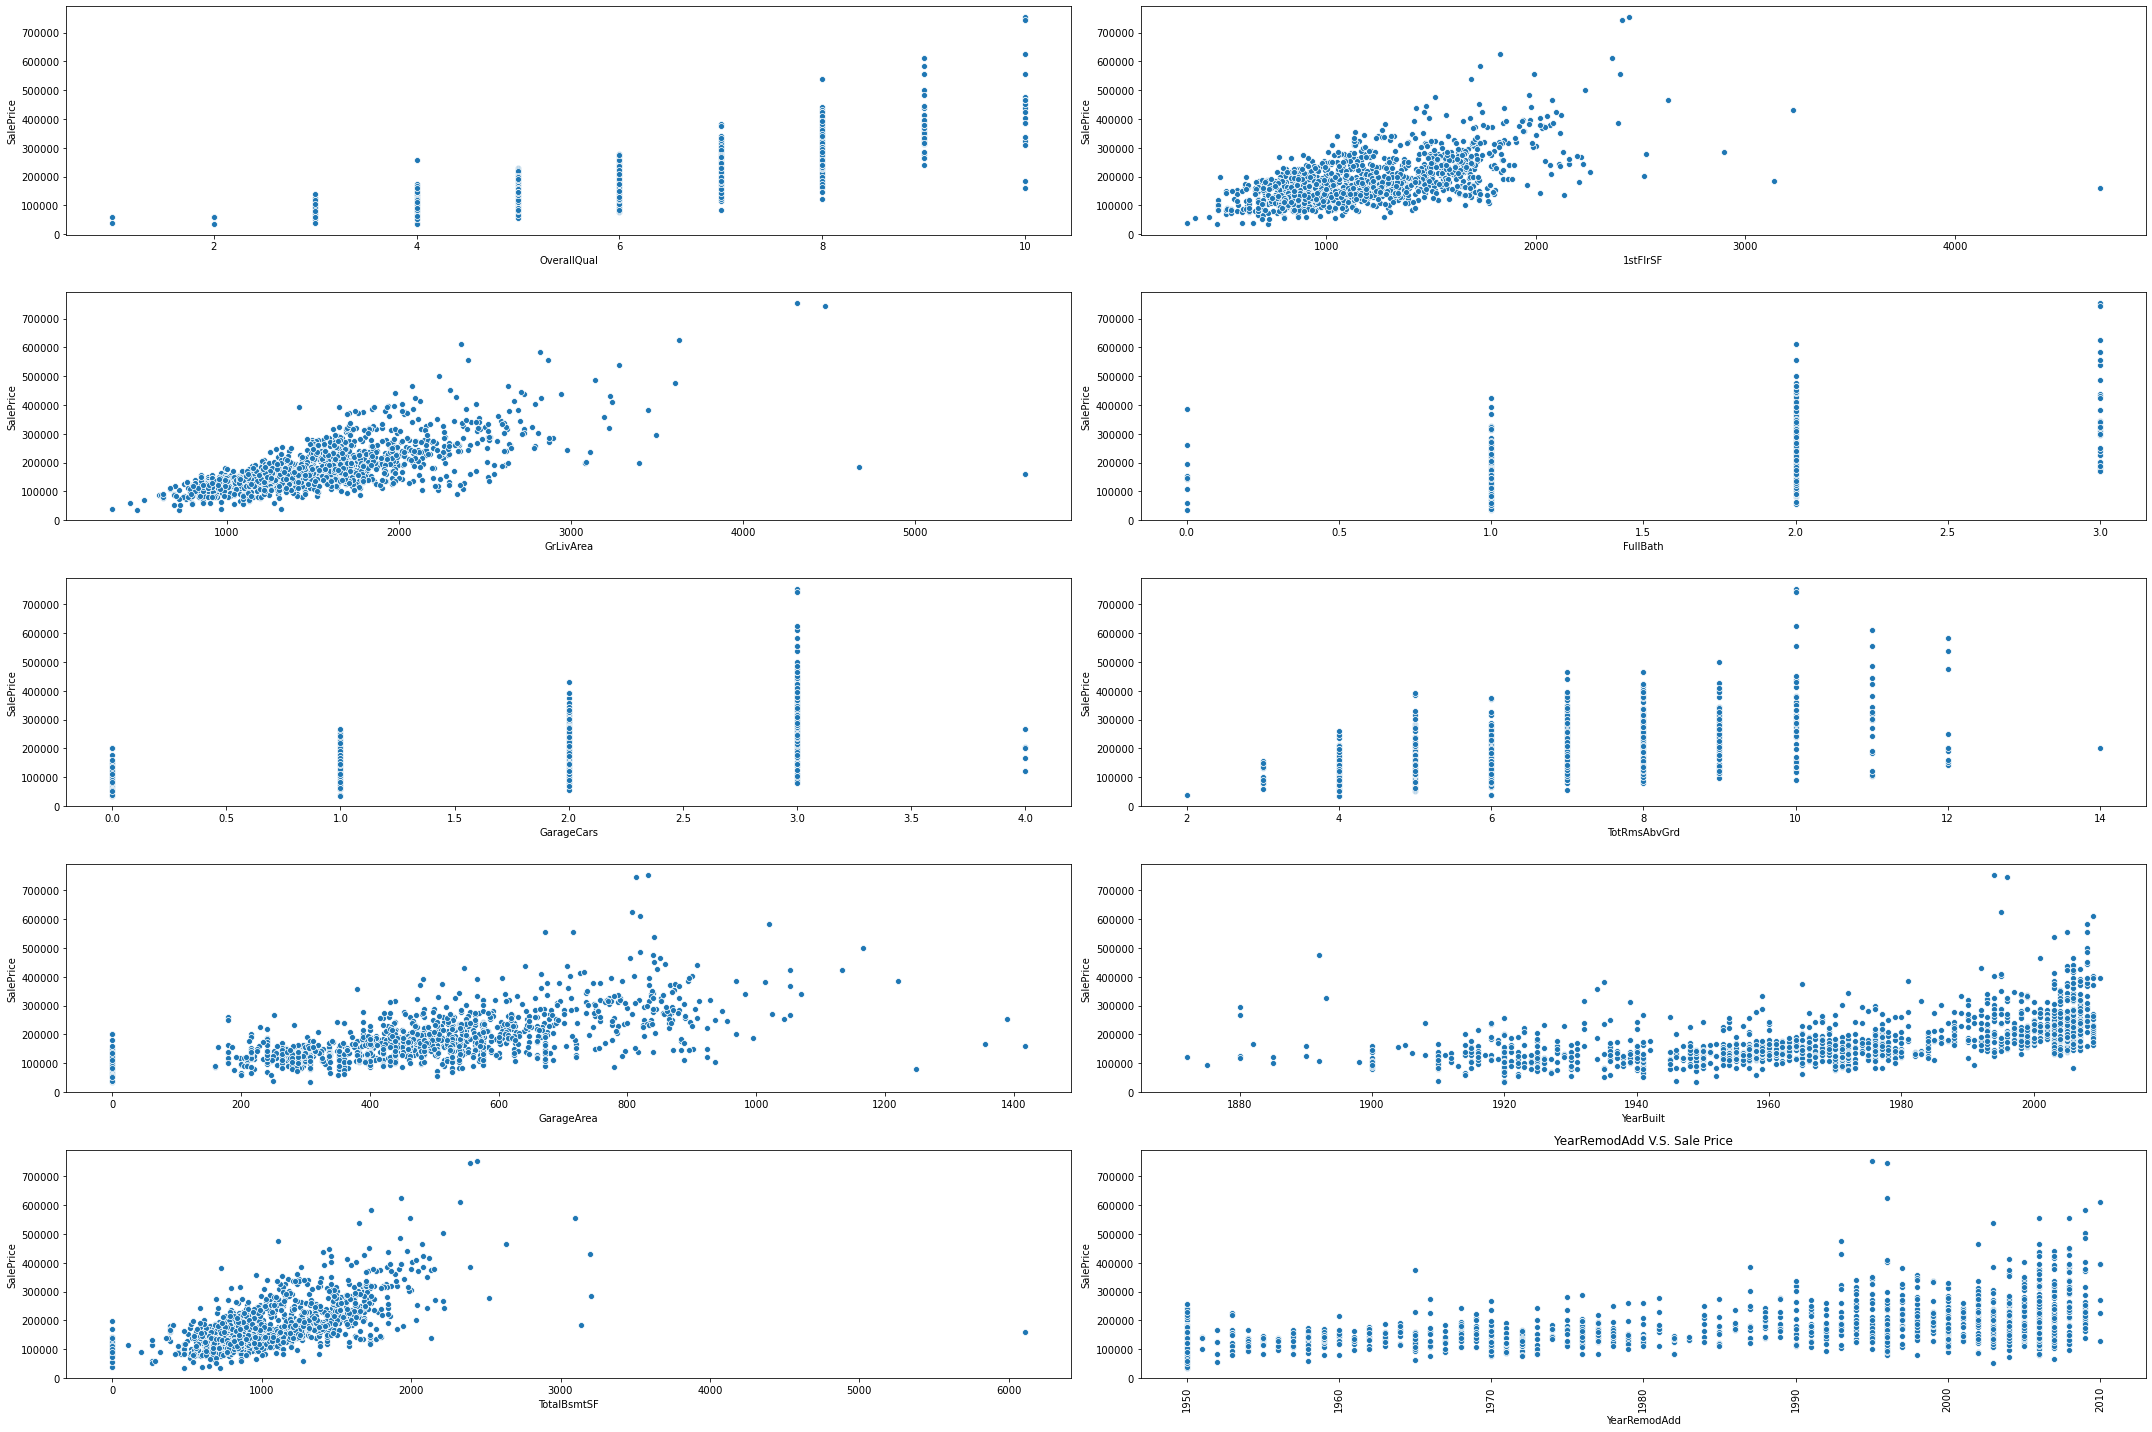

In [40]:
# calculate the correlation to identify the relationships between saleprice and other preditors
corrMatrix = df.corr()
print(corrMatrix.SalePrice.sort_values(ascending=False))

fig, axes = plt.subplots(5,2)
fig.set_size_inches(30, 20)
a=0
b=0
for i in (corrMatrix.SalePrice.sort_values(ascending=False).index[1:11]):
    sns.scatterplot(df[i], (df['SalePrice']),ax=axes[a,b])
    plt.title(str(i)+" V.S. Sale Price")
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)
    plt.tight_layout()
    a += 1
    if a % 5 != 0:
        a += 0
        b += 0
    else: 
        a = 0
        b += 1
plt.show()

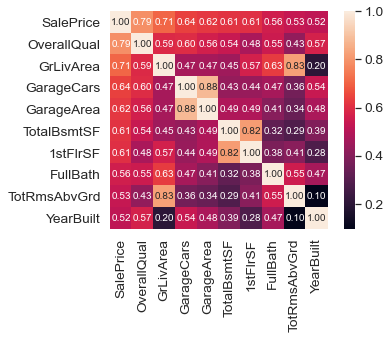

In [41]:
#Saleprice correlation matrix
k = 10 #number of variables for heatmap
#corrmat = df_train.corr()
cols = corrMatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Based on the above correlation calucation and scatterplots, the team found that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt,YearRemodAdd have the correatlion ratio above 0.5 (positive relationship).... 

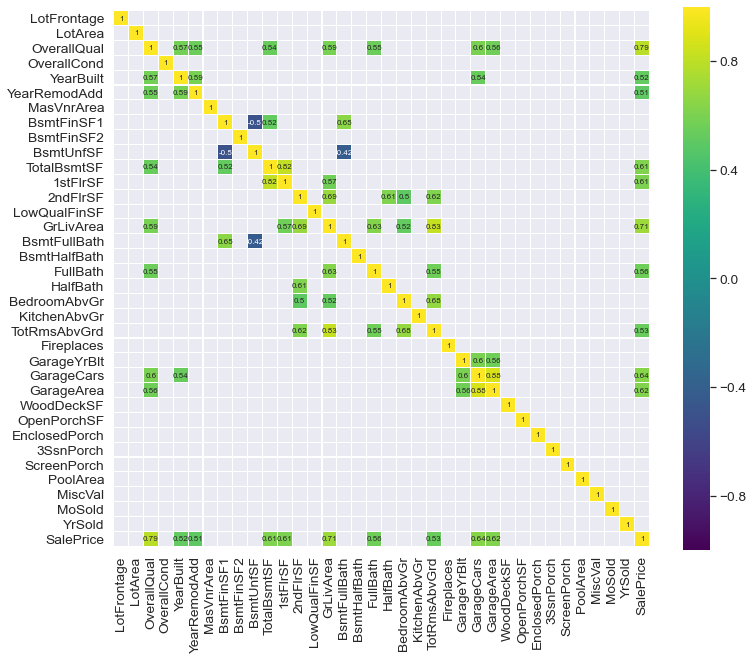

In [42]:
# To analyze the relationships among nemeric variables
plt.figure(figsize=(12, 10))

sns.heatmap(corrMatrix[(corrMatrix >= 0.5) | (corrMatrix <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

When checking the cross-correlation, highly correlated features include GarageArea & GarageCars (0.88), TotalRmsAbvGrd & GrLivArea (0.83), and TotalBsmtSF & 1stFlrSF (0.82)....

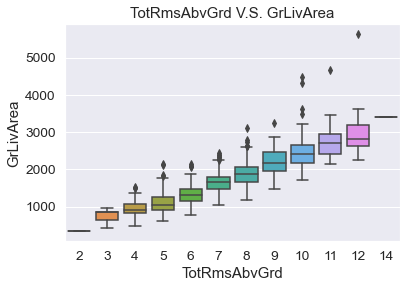

In [43]:
# Relation between TotRmsAbvGrd and GrLivArea
sns.boxplot(df['TotRmsAbvGrd'], df['GrLivArea'])
plt.title("TotRmsAbvGrd V.S. GrLivArea")
plt.xlabel('TotRmsAbvGrd')
plt.ylabel("GrLivArea")
plt.show()

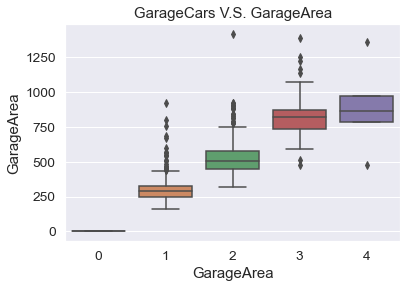

In [44]:
# Relation between GarageCars and GarageCars
sns.boxplot(df['GarageCars'], df['GarageArea'])
plt.title("GarageCars V.S. GarageArea")
plt.xlabel('GarageArea')
plt.ylabel("GarageArea")
plt.show()

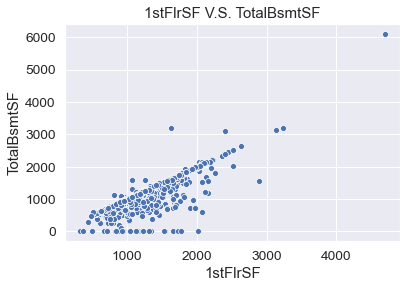

In [45]:
# Relation between 1stFlrSF and TotalBsmtSF
sns.scatterplot(df['1stFlrSF'], df['TotalBsmtSF'])
plt.title("1stFlrSF V.S. TotalBsmtSF")
plt.xlabel('1stFlrSF')
plt.ylabel("TotalBsmtSF")
plt.show()

Based on the above heatmap, TotRmsAbvGrd has strong relationship with GrLivArea, GarageArea has strong relationship with GarageCars, and 1stFlrSF has strong relationship with TotalBsmtSF.

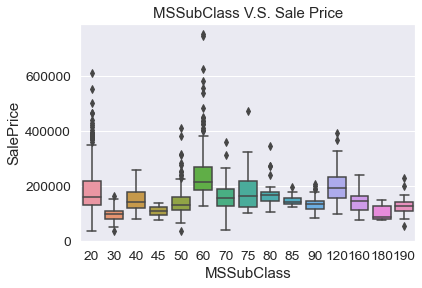

In [46]:
# Relation between MSSubClass and SalePrice
sns.boxplot(df['MSSubClass'], df['SalePrice'])
plt.title("MSSubClass V.S. Sale Price")
plt.xlabel('MSSubClass')
plt.ylabel("SalePrice")
plt.show()

 The meaning of each number from descriptiontion is as follows:
 
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Based on the charts above, it indicates that:
1. the age of house is a significatn important facotr in the sale price; House  is built on or after 1946 has a higheer sale price; 
2. the number of story is another important facotr in the sale price; 
3. the house that is whether finished or not is another impoartnt factor in the sale price.

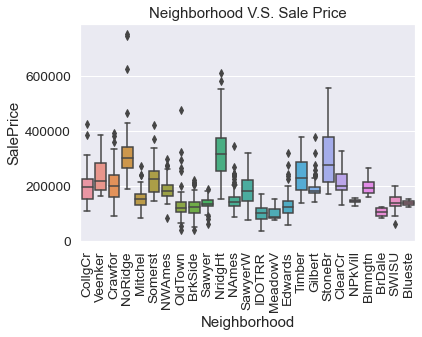

In [47]:
# Relation between Neighborhood and SalePrice
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.title("Neighborhood V.S. Sale Price")
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.ylabel("SalePrice")
plt.show()

 The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker		

Based on the charts above, it indicates that the sale price is significantly affedct by the physical locations.

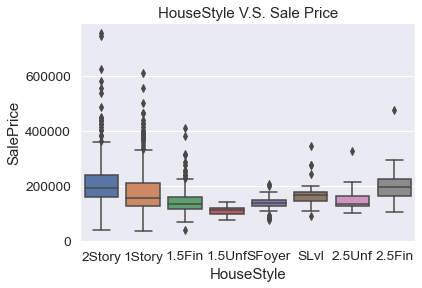

In [48]:
# Relation between HouseStyle and SalePrice
sns.boxplot(df['HouseStyle'], df['SalePrice'])
plt.title("HouseStyle V.S. Sale Price")
plt.xlabel('HouseStyle')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in Neighborhood (Physical locations within Ames city limits) from descriptiontion is as follows:
 
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl      Split Level

Based on the charts above, it confirmed the first thought based on the charts of MSSubClass:
1. the number of story is more, the sale price is higher; 
2. finished house is more expensive than unfinished house.

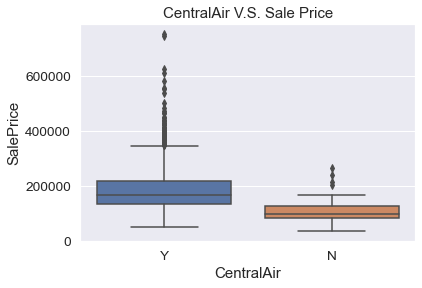

In [49]:
# Relation between CentralAir and SalePrice
sns.boxplot(df['CentralAir'], df['SalePrice'])
plt.title("CentralAir V.S. Sale Price")
plt.xlabel('CentralAir')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in CentralAir (Central air conditioning) from descriptiontion is as follows:
 
       N	No
       Y	Yes

Based on the charts above, it indicates that house with central air conditioning has a higher sale price and mroe people perfer central air conditioning. 

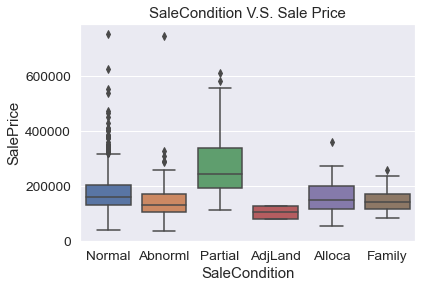

In [50]:
# Relation between SaleCondition and SalePrice
sns.boxplot(df['SaleCondition'], df['SalePrice'])
plt.title("SaleCondition V.S. Sale Price")
plt.xlabel('SaleCondition')
plt.ylabel("SalePrice")
plt.show()

The meaning of value in SaleCondition (Condition of sale) from descriptiontion is as follows:
 
       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Based on the charts above, it indicates that his  affedct by the sale condition. New contructed house usually has the higher sale price, and adjoining Land Purchase has the lowest sale price.

# Outlier

Becaue the size of the dataset is small, the team decides not to remvoe any outlier in this dataset at this point. 

# Development Baseline Models

The team will use Root-Mean-Squared-Error (RMSE) to measure each model performance. Bacause the dataset is small, the team will also use cross validatin to generate a more accuracy measurement. Moreover, the team will use log-transformation in feature engineering on target value, so the team will use corss_val_predict. In order to get the consistent performance measurement, the team decides to consistenly use corss_val_predict in below each performance measurement step.

In [51]:
#Preare train dataset and validation dateset
excludeColumns = ('SalePrice')
predictors = [s for s in df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x = pd.get_dummies(df[predictors],drop_first=True)
y = df[outcome]

In [52]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, rfr_pred)),2))

C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The de

RMSE: 30059.84


In [53]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, gbr_pred)),2))

RMSE: 26223.67


In [54]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, xgb_pred)),2))

RMSE: 30377.9


In [55]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x, y, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78558.7465259	total: 157ms	remaining: 2m 37s
1:	learn: 76508.3262154	total: 165ms	remaining: 1m 22s
2:	learn: 74709.7122762	total: 173ms	remaining: 57.5s
3:	learn: 72926.7017688	total: 184ms	remaining: 45.9s
4:	learn: 71205.9321016	total: 190ms	remaining: 37.9s
5:	learn: 69533.9874744	total: 197ms	remaining: 32.6s
6:	learn: 67859.2647938	total: 203ms	remaining: 28.8s
7:	learn: 66215.6760504	total: 209ms	remaining: 26s
8:	learn: 64647.8646647	total: 216ms	remaining: 23.8s
9:	learn: 63034.9406096	total: 224ms	remaining: 22.2s
10:	learn: 61576.6288520	total: 231ms	remaining: 20.8s
11:	learn: 60314.4675730	total: 240ms	remaining: 19.7s
12:	learn: 59058.5505101	total: 253ms	remaining: 19.2s
13:	learn: 57736.3746507	total: 258ms	remaining: 18.2s
14:	learn: 56569.5009676	total: 265ms	remaining: 17.4s
15:	learn: 55458.5973207	total: 271ms	remaining: 16.6s
16:	learn: 54379.4634700	total: 277ms	remaining: 16s
17:	learn: 53230.7776420	total: 282ms	remaining

156:	learn: 18775.3749600	total: 1.38s	remaining: 7.41s
157:	learn: 18730.8547767	total: 1.39s	remaining: 7.39s
158:	learn: 18711.4128067	total: 1.39s	remaining: 7.38s
159:	learn: 18664.7810599	total: 1.4s	remaining: 7.36s
160:	learn: 18649.3520307	total: 1.41s	remaining: 7.34s
161:	learn: 18612.8975888	total: 1.42s	remaining: 7.36s
162:	learn: 18562.4851340	total: 1.43s	remaining: 7.33s
163:	learn: 18521.6311154	total: 1.43s	remaining: 7.31s
164:	learn: 18458.5880491	total: 1.44s	remaining: 7.29s
165:	learn: 18417.2009166	total: 1.45s	remaining: 7.26s
166:	learn: 18372.1502999	total: 1.45s	remaining: 7.24s
167:	learn: 18320.4071587	total: 1.46s	remaining: 7.21s
168:	learn: 18272.4907494	total: 1.46s	remaining: 7.19s
169:	learn: 18245.9047289	total: 1.47s	remaining: 7.17s
170:	learn: 18206.9916964	total: 1.47s	remaining: 7.14s
171:	learn: 18158.2034057	total: 1.48s	remaining: 7.12s
172:	learn: 18128.9812506	total: 1.48s	remaining: 7.1s
173:	learn: 18090.9536049	total: 1.49s	remaining: 

314:	learn: 14192.4179719	total: 2.44s	remaining: 5.31s
315:	learn: 14169.4804001	total: 2.45s	remaining: 5.3s
316:	learn: 14149.9654879	total: 2.46s	remaining: 5.29s
317:	learn: 14111.5766657	total: 2.46s	remaining: 5.28s
318:	learn: 14094.4333075	total: 2.47s	remaining: 5.27s
319:	learn: 14074.9171230	total: 2.48s	remaining: 5.26s
320:	learn: 14054.3449734	total: 2.48s	remaining: 5.25s
321:	learn: 14037.1644105	total: 2.49s	remaining: 5.24s
322:	learn: 14005.8777933	total: 2.49s	remaining: 5.23s
323:	learn: 13996.0173815	total: 2.5s	remaining: 5.21s
324:	learn: 13973.4806896	total: 2.5s	remaining: 5.2s
325:	learn: 13961.0433713	total: 2.51s	remaining: 5.19s
326:	learn: 13929.9840993	total: 2.52s	remaining: 5.18s
327:	learn: 13901.2480112	total: 2.52s	remaining: 5.17s
328:	learn: 13890.9356267	total: 2.53s	remaining: 5.15s
329:	learn: 13850.5015211	total: 2.53s	remaining: 5.14s
330:	learn: 13830.5602219	total: 2.54s	remaining: 5.13s
331:	learn: 13800.2307452	total: 2.54s	remaining: 5.

463:	learn: 11485.5981218	total: 3.48s	remaining: 4.02s
464:	learn: 11467.5864019	total: 3.49s	remaining: 4.01s
465:	learn: 11446.4043569	total: 3.49s	remaining: 4s
466:	learn: 11420.6403487	total: 3.5s	remaining: 3.99s
467:	learn: 11411.7834010	total: 3.51s	remaining: 3.98s
468:	learn: 11397.5787329	total: 3.51s	remaining: 3.98s
469:	learn: 11386.4455698	total: 3.52s	remaining: 3.97s
470:	learn: 11382.0451542	total: 3.52s	remaining: 3.96s
471:	learn: 11363.4428129	total: 3.53s	remaining: 3.95s
472:	learn: 11349.9892455	total: 3.53s	remaining: 3.94s
473:	learn: 11331.5857621	total: 3.54s	remaining: 3.93s
474:	learn: 11316.1812863	total: 3.55s	remaining: 3.92s
475:	learn: 11311.1413065	total: 3.55s	remaining: 3.91s
476:	learn: 11285.3771357	total: 3.56s	remaining: 3.9s
477:	learn: 11274.5856132	total: 3.56s	remaining: 3.89s
478:	learn: 11258.3405433	total: 3.57s	remaining: 3.88s
479:	learn: 11247.3672803	total: 3.57s	remaining: 3.87s
480:	learn: 11229.2978757	total: 3.58s	remaining: 3.8

617:	learn: 9597.2554397	total: 4.53s	remaining: 2.8s
618:	learn: 9596.3496468	total: 4.53s	remaining: 2.79s
619:	learn: 9586.4819330	total: 4.54s	remaining: 2.78s
620:	learn: 9579.1375435	total: 4.54s	remaining: 2.77s
621:	learn: 9562.4324122	total: 4.55s	remaining: 2.77s
622:	learn: 9550.9783938	total: 4.57s	remaining: 2.76s
623:	learn: 9549.8660760	total: 4.57s	remaining: 2.75s
624:	learn: 9535.9712931	total: 4.59s	remaining: 2.75s
625:	learn: 9512.7261493	total: 4.6s	remaining: 2.75s
626:	learn: 9495.7313782	total: 4.6s	remaining: 2.74s
627:	learn: 9494.6340546	total: 4.61s	remaining: 2.73s
628:	learn: 9493.7234332	total: 4.61s	remaining: 2.72s
629:	learn: 9480.0904985	total: 4.62s	remaining: 2.71s
630:	learn: 9469.2979087	total: 4.62s	remaining: 2.7s
631:	learn: 9458.8533202	total: 4.64s	remaining: 2.7s
632:	learn: 9452.7799021	total: 4.65s	remaining: 2.7s
633:	learn: 9451.8627593	total: 4.66s	remaining: 2.69s
634:	learn: 9450.6880375	total: 4.67s	remaining: 2.68s
635:	learn: 9449

767:	learn: 8343.5214581	total: 5.56s	remaining: 1.68s
768:	learn: 8343.0279059	total: 5.57s	remaining: 1.67s
769:	learn: 8332.1437812	total: 5.58s	remaining: 1.67s
770:	learn: 8321.6762087	total: 5.58s	remaining: 1.66s
771:	learn: 8304.1875419	total: 5.59s	remaining: 1.65s
772:	learn: 8289.5534511	total: 5.6s	remaining: 1.64s
773:	learn: 8283.9922979	total: 5.61s	remaining: 1.64s
774:	learn: 8282.7106362	total: 5.62s	remaining: 1.63s
775:	learn: 8270.5406088	total: 5.62s	remaining: 1.62s
776:	learn: 8269.1161858	total: 5.63s	remaining: 1.61s
777:	learn: 8256.3183760	total: 5.63s	remaining: 1.61s
778:	learn: 8245.7455546	total: 5.64s	remaining: 1.6s
779:	learn: 8236.5894796	total: 5.65s	remaining: 1.59s
780:	learn: 8235.5677198	total: 5.66s	remaining: 1.58s
781:	learn: 8234.5535573	total: 5.66s	remaining: 1.58s
782:	learn: 8232.4948986	total: 5.67s	remaining: 1.57s
783:	learn: 8231.9713432	total: 5.67s	remaining: 1.56s
784:	learn: 8219.3229437	total: 5.68s	remaining: 1.55s
785:	learn: 

917:	learn: 7235.1791309	total: 6.58s	remaining: 588ms
918:	learn: 7222.5370903	total: 6.59s	remaining: 581ms
919:	learn: 7214.0344967	total: 6.59s	remaining: 573ms
920:	learn: 7204.8017437	total: 6.6s	remaining: 566ms
921:	learn: 7193.5156806	total: 6.61s	remaining: 560ms
922:	learn: 7180.0061152	total: 6.62s	remaining: 552ms
923:	learn: 7169.7081641	total: 6.62s	remaining: 545ms
924:	learn: 7161.6102063	total: 6.63s	remaining: 538ms
925:	learn: 7152.2415682	total: 6.64s	remaining: 530ms
926:	learn: 7146.4195982	total: 6.64s	remaining: 523ms
927:	learn: 7139.6963575	total: 6.65s	remaining: 516ms
928:	learn: 7133.2343160	total: 6.65s	remaining: 508ms
929:	learn: 7132.8788519	total: 6.66s	remaining: 501ms
930:	learn: 7128.6378717	total: 6.66s	remaining: 494ms
931:	learn: 7126.3809748	total: 6.67s	remaining: 487ms
932:	learn: 7114.9122024	total: 6.67s	remaining: 479ms
933:	learn: 7109.7330589	total: 6.68s	remaining: 472ms
934:	learn: 7109.3824059	total: 6.69s	remaining: 465ms
935:	learn:

71:	learn: 26201.0939828	total: 518ms	remaining: 6.68s
72:	learn: 25981.7848002	total: 525ms	remaining: 6.66s
73:	learn: 25822.0652401	total: 538ms	remaining: 6.73s
74:	learn: 25606.0165300	total: 544ms	remaining: 6.71s
75:	learn: 25439.9371555	total: 565ms	remaining: 6.87s
76:	learn: 25292.0926973	total: 581ms	remaining: 6.96s
77:	learn: 25117.3852800	total: 587ms	remaining: 6.94s
78:	learn: 24999.6199171	total: 599ms	remaining: 6.98s
79:	learn: 24831.4320000	total: 605ms	remaining: 6.95s
80:	learn: 24704.7721621	total: 610ms	remaining: 6.92s
81:	learn: 24530.0863547	total: 615ms	remaining: 6.89s
82:	learn: 24418.7574098	total: 621ms	remaining: 6.86s
83:	learn: 24316.9043535	total: 626ms	remaining: 6.83s
84:	learn: 24217.3555367	total: 632ms	remaining: 6.8s
85:	learn: 24078.6632135	total: 638ms	remaining: 6.78s
86:	learn: 23922.0528026	total: 643ms	remaining: 6.75s
87:	learn: 23807.2951884	total: 649ms	remaining: 6.73s
88:	learn: 23729.1773234	total: 669ms	remaining: 6.84s
89:	learn: 

225:	learn: 16539.3475871	total: 1.73s	remaining: 5.91s
226:	learn: 16499.4979439	total: 1.73s	remaining: 5.9s
227:	learn: 16478.5308229	total: 1.74s	remaining: 5.9s
228:	learn: 16451.0630203	total: 1.75s	remaining: 5.89s
229:	learn: 16441.0233968	total: 1.75s	remaining: 5.88s
230:	learn: 16431.0897839	total: 1.76s	remaining: 5.86s
231:	learn: 16423.4223744	total: 1.77s	remaining: 5.85s
232:	learn: 16414.1115369	total: 1.77s	remaining: 5.83s
233:	learn: 16393.6494740	total: 1.78s	remaining: 5.82s
234:	learn: 16366.5787590	total: 1.79s	remaining: 5.82s
235:	learn: 16329.0923402	total: 1.79s	remaining: 5.8s
236:	learn: 16322.3382930	total: 1.8s	remaining: 5.79s
237:	learn: 16304.5597122	total: 1.8s	remaining: 5.78s
238:	learn: 16291.8162146	total: 1.81s	remaining: 5.76s
239:	learn: 16270.5283815	total: 1.82s	remaining: 5.76s
240:	learn: 16235.6665791	total: 1.83s	remaining: 5.75s
241:	learn: 16211.2661625	total: 1.83s	remaining: 5.75s
242:	learn: 16181.9516621	total: 1.84s	remaining: 5.7

380:	learn: 13215.9247039	total: 2.95s	remaining: 4.8s
381:	learn: 13192.7691051	total: 2.96s	remaining: 4.79s
382:	learn: 13162.4329418	total: 2.98s	remaining: 4.8s
383:	learn: 13160.0647864	total: 3s	remaining: 4.81s
384:	learn: 13151.6512039	total: 3s	remaining: 4.79s
385:	learn: 13133.4981730	total: 3.01s	remaining: 4.78s
386:	learn: 13126.5500838	total: 3.01s	remaining: 4.77s
387:	learn: 13103.5766298	total: 3.02s	remaining: 4.76s
388:	learn: 13089.8047166	total: 3.02s	remaining: 4.75s
389:	learn: 13062.1184331	total: 3.03s	remaining: 4.74s
390:	learn: 13038.5158522	total: 3.04s	remaining: 4.73s
391:	learn: 13031.3901386	total: 3.04s	remaining: 4.72s
392:	learn: 13000.1318089	total: 3.04s	remaining: 4.7s
393:	learn: 12997.2703645	total: 3.05s	remaining: 4.69s
394:	learn: 12989.2677100	total: 3.06s	remaining: 4.68s
395:	learn: 12973.6891874	total: 3.06s	remaining: 4.67s
396:	learn: 12956.9246034	total: 3.07s	remaining: 4.66s
397:	learn: 12936.2195142	total: 3.08s	remaining: 4.66s
3

543:	learn: 10795.7687957	total: 4.17s	remaining: 3.5s
544:	learn: 10784.8465499	total: 4.18s	remaining: 3.49s
545:	learn: 10774.6854638	total: 4.19s	remaining: 3.48s
546:	learn: 10749.8402224	total: 4.19s	remaining: 3.47s
547:	learn: 10740.5334849	total: 4.2s	remaining: 3.46s
548:	learn: 10724.1032452	total: 4.21s	remaining: 3.46s
549:	learn: 10722.4890467	total: 4.22s	remaining: 3.45s
550:	learn: 10707.2542478	total: 4.22s	remaining: 3.44s
551:	learn: 10701.7727812	total: 4.23s	remaining: 3.44s
552:	learn: 10696.2458178	total: 4.24s	remaining: 3.43s
553:	learn: 10691.2629597	total: 4.24s	remaining: 3.42s
554:	learn: 10689.2803247	total: 4.25s	remaining: 3.41s
555:	learn: 10678.7536240	total: 4.26s	remaining: 3.4s
556:	learn: 10669.9864721	total: 4.26s	remaining: 3.39s
557:	learn: 10658.0212514	total: 4.27s	remaining: 3.38s
558:	learn: 10639.0577694	total: 4.28s	remaining: 3.38s
559:	learn: 10628.3393605	total: 4.29s	remaining: 3.37s
560:	learn: 10614.4735526	total: 4.29s	remaining: 3

704:	learn: 9058.2469151	total: 5.41s	remaining: 2.26s
705:	learn: 9041.1365925	total: 5.42s	remaining: 2.25s
706:	learn: 9031.9570090	total: 5.42s	remaining: 2.25s
707:	learn: 9023.8089475	total: 5.43s	remaining: 2.24s
708:	learn: 9018.6479443	total: 5.43s	remaining: 2.23s
709:	learn: 9009.5946436	total: 5.44s	remaining: 2.22s
710:	learn: 9004.6275589	total: 5.45s	remaining: 2.21s
711:	learn: 8991.3940988	total: 5.45s	remaining: 2.21s
712:	learn: 8980.1409311	total: 5.46s	remaining: 2.2s
713:	learn: 8968.6488598	total: 5.46s	remaining: 2.19s
714:	learn: 8957.2248287	total: 5.47s	remaining: 2.18s
715:	learn: 8946.2529637	total: 5.47s	remaining: 2.17s
716:	learn: 8935.8114983	total: 5.5s	remaining: 2.17s
717:	learn: 8922.4087792	total: 5.5s	remaining: 2.16s
718:	learn: 8904.1932130	total: 5.51s	remaining: 2.15s
719:	learn: 8892.8812330	total: 5.53s	remaining: 2.15s
720:	learn: 8879.9810419	total: 5.53s	remaining: 2.14s
721:	learn: 8879.1742168	total: 5.54s	remaining: 2.13s
722:	learn: 8

860:	learn: 7735.6026050	total: 6.82s	remaining: 1.1s
861:	learn: 7730.3959780	total: 6.83s	remaining: 1.09s
862:	learn: 7729.7132211	total: 6.83s	remaining: 1.08s
863:	learn: 7729.1180094	total: 6.84s	remaining: 1.08s
864:	learn: 7726.7623261	total: 6.85s	remaining: 1.07s
865:	learn: 7718.5108044	total: 6.85s	remaining: 1.06s
866:	learn: 7710.4096396	total: 6.86s	remaining: 1.05s
867:	learn: 7703.7622188	total: 6.86s	remaining: 1.04s
868:	learn: 7698.1350883	total: 6.87s	remaining: 1.03s
869:	learn: 7692.0421613	total: 6.88s	remaining: 1.03s
870:	learn: 7685.1827079	total: 6.88s	remaining: 1.02s
871:	learn: 7676.9746013	total: 6.89s	remaining: 1.01s
872:	learn: 7676.4376342	total: 6.91s	remaining: 1s
873:	learn: 7672.4413639	total: 6.91s	remaining: 996ms
874:	learn: 7671.7031411	total: 6.92s	remaining: 988ms
875:	learn: 7662.9718612	total: 6.92s	remaining: 980ms
876:	learn: 7659.0435002	total: 6.93s	remaining: 972ms
877:	learn: 7648.8604380	total: 6.93s	remaining: 963ms
878:	learn: 76

23:	learn: 46935.5639769	total: 180ms	remaining: 7.3s
24:	learn: 46103.2317450	total: 185ms	remaining: 7.23s
25:	learn: 45357.5562356	total: 194ms	remaining: 7.28s
26:	learn: 44616.3430056	total: 202ms	remaining: 7.27s
27:	learn: 43855.9382788	total: 224ms	remaining: 7.77s
28:	learn: 43147.9438085	total: 230ms	remaining: 7.71s
29:	learn: 42400.1584799	total: 242ms	remaining: 7.81s
30:	learn: 41788.5370752	total: 254ms	remaining: 7.94s
31:	learn: 41170.2577059	total: 260ms	remaining: 7.87s
32:	learn: 40595.5762669	total: 283ms	remaining: 8.3s
33:	learn: 40010.6278491	total: 289ms	remaining: 8.2s
34:	learn: 39342.1196781	total: 297ms	remaining: 8.2s
35:	learn: 38759.0311734	total: 303ms	remaining: 8.11s
36:	learn: 38169.9849002	total: 308ms	remaining: 8.02s
37:	learn: 37623.9881980	total: 314ms	remaining: 7.95s
38:	learn: 37143.5574237	total: 319ms	remaining: 7.86s
39:	learn: 36681.1639115	total: 325ms	remaining: 7.8s
40:	learn: 36176.2460418	total: 331ms	remaining: 7.75s
41:	learn: 3568

182:	learn: 17939.0401776	total: 1.4s	remaining: 6.25s
183:	learn: 17926.2532404	total: 1.41s	remaining: 6.23s
184:	learn: 17910.0777163	total: 1.41s	remaining: 6.22s
185:	learn: 17872.1631465	total: 1.42s	remaining: 6.21s
186:	learn: 17832.4386317	total: 1.42s	remaining: 6.19s
187:	learn: 17784.3796787	total: 1.43s	remaining: 6.18s
188:	learn: 17760.2294265	total: 1.45s	remaining: 6.22s
189:	learn: 17721.5565468	total: 1.45s	remaining: 6.2s
190:	learn: 17688.3959142	total: 1.46s	remaining: 6.19s
191:	learn: 17668.9996912	total: 1.47s	remaining: 6.17s
192:	learn: 17637.3831255	total: 1.47s	remaining: 6.16s
193:	learn: 17594.5083686	total: 1.48s	remaining: 6.14s
194:	learn: 17547.4011670	total: 1.48s	remaining: 6.12s
195:	learn: 17538.3044706	total: 1.49s	remaining: 6.11s
196:	learn: 17492.0883578	total: 1.49s	remaining: 6.09s
197:	learn: 17457.4974181	total: 1.5s	remaining: 6.08s
198:	learn: 17435.2824236	total: 1.5s	remaining: 6.06s
199:	learn: 17406.3893816	total: 1.51s	remaining: 6.

347:	learn: 13777.1485782	total: 2.57s	remaining: 4.82s
348:	learn: 13754.3590028	total: 2.58s	remaining: 4.81s
349:	learn: 13737.8276440	total: 2.58s	remaining: 4.8s
350:	learn: 13716.8847810	total: 2.59s	remaining: 4.79s
351:	learn: 13691.4145564	total: 2.61s	remaining: 4.8s
352:	learn: 13661.7633500	total: 2.61s	remaining: 4.79s
353:	learn: 13652.8317930	total: 2.62s	remaining: 4.78s
354:	learn: 13633.9875891	total: 2.63s	remaining: 4.77s
355:	learn: 13628.1540561	total: 2.63s	remaining: 4.76s
356:	learn: 13596.1933618	total: 2.64s	remaining: 4.75s
357:	learn: 13587.9479456	total: 2.64s	remaining: 4.74s
358:	learn: 13580.6916846	total: 2.65s	remaining: 4.73s
359:	learn: 13554.0275522	total: 2.65s	remaining: 4.72s
360:	learn: 13527.5255306	total: 2.66s	remaining: 4.71s
361:	learn: 13500.2182826	total: 2.67s	remaining: 4.7s
362:	learn: 13474.8305798	total: 2.67s	remaining: 4.69s
363:	learn: 13471.5814776	total: 2.68s	remaining: 4.68s
364:	learn: 13437.9826716	total: 2.68s	remaining: 4

514:	learn: 10967.9722671	total: 3.79s	remaining: 3.57s
515:	learn: 10951.2979493	total: 3.8s	remaining: 3.56s
516:	learn: 10940.0557195	total: 3.81s	remaining: 3.56s
517:	learn: 10919.3218899	total: 3.82s	remaining: 3.55s
518:	learn: 10900.8820787	total: 3.83s	remaining: 3.55s
519:	learn: 10894.7293506	total: 3.83s	remaining: 3.54s
520:	learn: 10888.2885465	total: 3.84s	remaining: 3.53s
521:	learn: 10877.5919061	total: 3.84s	remaining: 3.52s
522:	learn: 10863.6524687	total: 3.85s	remaining: 3.51s
523:	learn: 10854.9989245	total: 3.85s	remaining: 3.5s
524:	learn: 10833.8968851	total: 3.87s	remaining: 3.5s
525:	learn: 10826.9042942	total: 3.88s	remaining: 3.49s
526:	learn: 10803.6042669	total: 3.88s	remaining: 3.48s
527:	learn: 10788.1011028	total: 3.89s	remaining: 3.48s
528:	learn: 10769.2353534	total: 3.91s	remaining: 3.48s
529:	learn: 10767.9584010	total: 3.92s	remaining: 3.48s
530:	learn: 10758.3039252	total: 3.93s	remaining: 3.47s
531:	learn: 10742.9094193	total: 3.93s	remaining: 3

668:	learn: 9162.6896862	total: 4.98s	remaining: 2.46s
669:	learn: 9151.1798445	total: 4.99s	remaining: 2.46s
670:	learn: 9150.2095733	total: 5s	remaining: 2.45s
671:	learn: 9142.0948608	total: 5s	remaining: 2.44s
672:	learn: 9123.1955221	total: 5.01s	remaining: 2.43s
673:	learn: 9114.2842820	total: 5.01s	remaining: 2.43s
674:	learn: 9113.1239065	total: 5.02s	remaining: 2.42s
675:	learn: 9106.2632632	total: 5.04s	remaining: 2.42s
676:	learn: 9087.5726368	total: 5.05s	remaining: 2.41s
677:	learn: 9081.7390074	total: 5.06s	remaining: 2.4s
678:	learn: 9076.1943041	total: 5.07s	remaining: 2.4s
679:	learn: 9063.3665930	total: 5.08s	remaining: 2.39s
680:	learn: 9049.3780781	total: 5.09s	remaining: 2.38s
681:	learn: 9048.3235496	total: 5.09s	remaining: 2.38s
682:	learn: 9031.4262532	total: 5.12s	remaining: 2.37s
683:	learn: 9025.6637811	total: 5.12s	remaining: 2.37s
684:	learn: 9011.9551747	total: 5.13s	remaining: 2.36s
685:	learn: 9004.1687887	total: 5.13s	remaining: 2.35s
686:	learn: 8991.3

836:	learn: 7708.1867518	total: 6.21s	remaining: 1.21s
837:	learn: 7700.7148675	total: 6.21s	remaining: 1.2s
838:	learn: 7695.0774167	total: 6.22s	remaining: 1.19s
839:	learn: 7688.0693272	total: 6.24s	remaining: 1.19s
840:	learn: 7681.0985221	total: 6.24s	remaining: 1.18s
841:	learn: 7680.6318310	total: 6.25s	remaining: 1.17s
842:	learn: 7680.0704642	total: 6.25s	remaining: 1.16s
843:	learn: 7669.1103444	total: 6.26s	remaining: 1.16s
844:	learn: 7666.3271307	total: 6.28s	remaining: 1.15s
845:	learn: 7655.8940066	total: 6.29s	remaining: 1.15s
846:	learn: 7648.9755526	total: 6.3s	remaining: 1.14s
847:	learn: 7636.9500499	total: 6.31s	remaining: 1.13s
848:	learn: 7633.0975753	total: 6.32s	remaining: 1.12s
849:	learn: 7624.6017124	total: 6.32s	remaining: 1.11s
850:	learn: 7612.7087478	total: 6.33s	remaining: 1.11s
851:	learn: 7600.9270343	total: 6.33s	remaining: 1.1s
852:	learn: 7592.0896125	total: 6.34s	remaining: 1.09s
853:	learn: 7591.6684752	total: 6.34s	remaining: 1.08s
854:	learn: 7

988:	learn: 6667.7884980	total: 7.26s	remaining: 80.8ms
989:	learn: 6660.4053102	total: 7.27s	remaining: 73.4ms
990:	learn: 6651.2363963	total: 7.28s	remaining: 66.1ms
991:	learn: 6644.0907934	total: 7.28s	remaining: 58.7ms
992:	learn: 6639.5860467	total: 7.29s	remaining: 51.4ms
993:	learn: 6631.4270096	total: 7.29s	remaining: 44ms
994:	learn: 6630.1592210	total: 7.3s	remaining: 36.7ms
995:	learn: 6628.9360683	total: 7.32s	remaining: 29.4ms
996:	learn: 6624.9554169	total: 7.33s	remaining: 22ms
997:	learn: 6623.6966215	total: 7.33s	remaining: 14.7ms
998:	learn: 6610.8371311	total: 7.34s	remaining: 7.34ms
999:	learn: 6609.7678827	total: 7.34s	remaining: 0us
Learning rate set to 0.040974
0:	learn: 76956.4311563	total: 5.82ms	remaining: 5.82s
1:	learn: 74944.0897999	total: 12.5ms	remaining: 6.22s
2:	learn: 73146.1857016	total: 29.2ms	remaining: 9.7s
3:	learn: 71306.5829006	total: 34.4ms	remaining: 8.56s
4:	learn: 69614.1038364	total: 39.8ms	remaining: 7.92s
5:	learn: 67859.7448104	total: 4

162:	learn: 18288.5828269	total: 1.23s	remaining: 6.33s
163:	learn: 18246.2483492	total: 1.24s	remaining: 6.31s
164:	learn: 18232.9779312	total: 1.24s	remaining: 6.3s
165:	learn: 18170.8531298	total: 1.25s	remaining: 6.28s
166:	learn: 18130.2726358	total: 1.27s	remaining: 6.34s
167:	learn: 18100.8262852	total: 1.29s	remaining: 6.37s
168:	learn: 18067.8678938	total: 1.29s	remaining: 6.35s
169:	learn: 18039.2986831	total: 1.3s	remaining: 6.33s
170:	learn: 18028.9737049	total: 1.31s	remaining: 6.38s
171:	learn: 17992.3773963	total: 1.33s	remaining: 6.4s
172:	learn: 17972.7175609	total: 1.33s	remaining: 6.38s
173:	learn: 17916.8753204	total: 1.34s	remaining: 6.36s
174:	learn: 17903.1018589	total: 1.34s	remaining: 6.34s
175:	learn: 17893.0233004	total: 1.35s	remaining: 6.33s
176:	learn: 17881.9792539	total: 1.36s	remaining: 6.31s
177:	learn: 17833.5862370	total: 1.36s	remaining: 6.29s
178:	learn: 17794.8593903	total: 1.37s	remaining: 6.27s
179:	learn: 17751.8720447	total: 1.37s	remaining: 6

322:	learn: 14063.1630054	total: 2.46s	remaining: 5.15s
323:	learn: 14042.6211906	total: 2.46s	remaining: 5.14s
324:	learn: 14018.1443713	total: 2.48s	remaining: 5.15s
325:	learn: 13999.1843010	total: 2.49s	remaining: 5.16s
326:	learn: 13969.6982424	total: 2.5s	remaining: 5.14s
327:	learn: 13940.2767919	total: 2.5s	remaining: 5.13s
328:	learn: 13921.1950995	total: 2.51s	remaining: 5.12s
329:	learn: 13905.7770073	total: 2.52s	remaining: 5.11s
330:	learn: 13894.4635585	total: 2.52s	remaining: 5.1s
331:	learn: 13871.0775264	total: 2.53s	remaining: 5.08s
332:	learn: 13847.9324776	total: 2.53s	remaining: 5.07s
333:	learn: 13824.7192770	total: 2.54s	remaining: 5.06s
334:	learn: 13810.1809405	total: 2.54s	remaining: 5.05s
335:	learn: 13794.5374296	total: 2.55s	remaining: 5.04s
336:	learn: 13772.4287640	total: 2.55s	remaining: 5.03s
337:	learn: 13752.1791181	total: 2.56s	remaining: 5.01s
338:	learn: 13727.5073274	total: 2.57s	remaining: 5s
339:	learn: 13717.8944462	total: 2.57s	remaining: 4.99

491:	learn: 11105.3237915	total: 3.7s	remaining: 3.83s
492:	learn: 11088.1741204	total: 3.71s	remaining: 3.82s
493:	learn: 11083.0853317	total: 3.72s	remaining: 3.81s
494:	learn: 11074.0256648	total: 3.73s	remaining: 3.8s
495:	learn: 11061.9743005	total: 3.73s	remaining: 3.79s
496:	learn: 11055.4661631	total: 3.74s	remaining: 3.79s
497:	learn: 11049.8242691	total: 3.76s	remaining: 3.79s
498:	learn: 11028.1315727	total: 3.77s	remaining: 3.78s
499:	learn: 11020.9932924	total: 3.78s	remaining: 3.78s
500:	learn: 11004.1681999	total: 3.79s	remaining: 3.77s
501:	learn: 11001.6404053	total: 3.79s	remaining: 3.77s
502:	learn: 10985.4347880	total: 3.81s	remaining: 3.76s
503:	learn: 10969.3075541	total: 3.82s	remaining: 3.76s
504:	learn: 10955.8589722	total: 3.83s	remaining: 3.75s
505:	learn: 10934.0649794	total: 3.83s	remaining: 3.74s
506:	learn: 10928.2710211	total: 3.85s	remaining: 3.75s
507:	learn: 10894.7752814	total: 3.86s	remaining: 3.74s
508:	learn: 10876.3947616	total: 3.86s	remaining: 

653:	learn: 9059.9503763	total: 5.1s	remaining: 2.7s
654:	learn: 9046.1453427	total: 5.11s	remaining: 2.69s
655:	learn: 9040.6904066	total: 5.12s	remaining: 2.68s
656:	learn: 9038.9057278	total: 5.12s	remaining: 2.67s
657:	learn: 9028.8438884	total: 5.13s	remaining: 2.67s
658:	learn: 9027.1805396	total: 5.13s	remaining: 2.66s
659:	learn: 9019.9330903	total: 5.14s	remaining: 2.65s
660:	learn: 9007.4394065	total: 5.14s	remaining: 2.64s
661:	learn: 8997.2344527	total: 5.15s	remaining: 2.63s
662:	learn: 8988.7662634	total: 5.16s	remaining: 2.62s
663:	learn: 8980.3218969	total: 5.16s	remaining: 2.61s
664:	learn: 8971.4548882	total: 5.17s	remaining: 2.6s
665:	learn: 8957.1900273	total: 5.17s	remaining: 2.59s
666:	learn: 8938.4891348	total: 5.18s	remaining: 2.59s
667:	learn: 8937.2022802	total: 5.18s	remaining: 2.58s
668:	learn: 8925.2700829	total: 5.19s	remaining: 2.57s
669:	learn: 8923.1108113	total: 5.2s	remaining: 2.56s
670:	learn: 8905.7934724	total: 5.2s	remaining: 2.55s
671:	learn: 890

806:	learn: 7715.7948357	total: 6.53s	remaining: 1.56s
807:	learn: 7705.1344937	total: 6.55s	remaining: 1.56s
808:	learn: 7694.9708077	total: 6.56s	remaining: 1.55s
809:	learn: 7692.1469917	total: 6.56s	remaining: 1.54s
810:	learn: 7688.6799175	total: 6.58s	remaining: 1.53s
811:	learn: 7677.0053666	total: 6.58s	remaining: 1.52s
812:	learn: 7663.6802268	total: 6.59s	remaining: 1.52s
813:	learn: 7654.4710165	total: 6.6s	remaining: 1.51s
814:	learn: 7653.5056598	total: 6.61s	remaining: 1.5s
815:	learn: 7646.5415061	total: 6.61s	remaining: 1.49s
816:	learn: 7634.0777857	total: 6.62s	remaining: 1.48s
817:	learn: 7622.3132796	total: 6.62s	remaining: 1.47s
818:	learn: 7607.8696351	total: 6.64s	remaining: 1.47s
819:	learn: 7595.4497269	total: 6.64s	remaining: 1.46s
820:	learn: 7586.8952550	total: 6.65s	remaining: 1.45s
821:	learn: 7578.1060168	total: 6.67s	remaining: 1.44s
822:	learn: 7567.8782926	total: 6.67s	remaining: 1.44s
823:	learn: 7566.5371005	total: 6.68s	remaining: 1.43s
824:	learn: 

962:	learn: 6625.7064501	total: 7.75s	remaining: 298ms
963:	learn: 6621.0964001	total: 7.76s	remaining: 290ms
964:	learn: 6620.5969732	total: 7.78s	remaining: 282ms
965:	learn: 6613.4786963	total: 7.79s	remaining: 274ms
966:	learn: 6608.1405027	total: 7.8s	remaining: 266ms
967:	learn: 6601.3909232	total: 7.81s	remaining: 258ms
968:	learn: 6592.0677961	total: 7.81s	remaining: 250ms
969:	learn: 6583.9547651	total: 7.82s	remaining: 242ms
970:	learn: 6572.4067504	total: 7.82s	remaining: 234ms
971:	learn: 6560.1405274	total: 7.83s	remaining: 225ms
972:	learn: 6550.9739164	total: 7.84s	remaining: 218ms
973:	learn: 6544.3097586	total: 7.84s	remaining: 209ms
974:	learn: 6535.9196056	total: 7.85s	remaining: 201ms
975:	learn: 6528.6100514	total: 7.85s	remaining: 193ms
976:	learn: 6521.9785422	total: 7.86s	remaining: 185ms
977:	learn: 6516.1964274	total: 7.87s	remaining: 177ms
978:	learn: 6510.4119956	total: 7.87s	remaining: 169ms
979:	learn: 6507.8122087	total: 7.88s	remaining: 161ms
980:	learn:

133:	learn: 19507.2913165	total: 1.05s	remaining: 6.79s
134:	learn: 19439.7159176	total: 1.06s	remaining: 6.78s
135:	learn: 19367.2155357	total: 1.06s	remaining: 6.77s
136:	learn: 19313.9956696	total: 1.08s	remaining: 6.79s
137:	learn: 19272.7002516	total: 1.08s	remaining: 6.78s
138:	learn: 19194.5449700	total: 1.09s	remaining: 6.76s
139:	learn: 19106.8711115	total: 1.1s	remaining: 6.75s
140:	learn: 19044.2639129	total: 1.11s	remaining: 6.74s
141:	learn: 18999.4121904	total: 1.11s	remaining: 6.74s
142:	learn: 18952.2286000	total: 1.13s	remaining: 6.78s
143:	learn: 18905.1667149	total: 1.14s	remaining: 6.75s
144:	learn: 18856.2394834	total: 1.14s	remaining: 6.74s
145:	learn: 18798.5286194	total: 1.15s	remaining: 6.72s
146:	learn: 18736.4314013	total: 1.15s	remaining: 6.7s
147:	learn: 18674.9768006	total: 1.16s	remaining: 6.69s
148:	learn: 18615.5951855	total: 1.17s	remaining: 6.68s
149:	learn: 18574.8659356	total: 1.18s	remaining: 6.66s
150:	learn: 18502.1707114	total: 1.18s	remaining: 

303:	learn: 13768.3165582	total: 2.27s	remaining: 5.19s
304:	learn: 13738.8426675	total: 2.27s	remaining: 5.18s
305:	learn: 13713.6069667	total: 2.28s	remaining: 5.17s
306:	learn: 13685.6491584	total: 2.29s	remaining: 5.16s
307:	learn: 13672.0760395	total: 2.29s	remaining: 5.15s
308:	learn: 13648.1473958	total: 2.3s	remaining: 5.14s
309:	learn: 13619.8846893	total: 2.31s	remaining: 5.14s
310:	learn: 13600.1215299	total: 2.31s	remaining: 5.13s
311:	learn: 13572.0800922	total: 2.32s	remaining: 5.12s
312:	learn: 13545.4785950	total: 2.33s	remaining: 5.11s
313:	learn: 13524.1203428	total: 2.33s	remaining: 5.1s
314:	learn: 13506.1948613	total: 2.34s	remaining: 5.09s
315:	learn: 13482.1598878	total: 2.35s	remaining: 5.08s
316:	learn: 13456.1439541	total: 2.35s	remaining: 5.07s
317:	learn: 13433.9263698	total: 2.37s	remaining: 5.08s
318:	learn: 13409.3770064	total: 2.37s	remaining: 5.07s
319:	learn: 13380.0225543	total: 2.38s	remaining: 5.07s
320:	learn: 13359.4372942	total: 2.4s	remaining: 5

457:	learn: 10881.0142157	total: 3.32s	remaining: 3.93s
458:	learn: 10865.7983882	total: 3.33s	remaining: 3.92s
459:	learn: 10850.0658206	total: 3.34s	remaining: 3.92s
460:	learn: 10847.0057072	total: 3.34s	remaining: 3.91s
461:	learn: 10824.9343168	total: 3.35s	remaining: 3.9s
462:	learn: 10803.9010766	total: 3.36s	remaining: 3.89s
463:	learn: 10786.2143420	total: 3.36s	remaining: 3.88s
464:	learn: 10780.9087237	total: 3.37s	remaining: 3.88s
465:	learn: 10774.8186284	total: 3.37s	remaining: 3.87s
466:	learn: 10769.5142035	total: 3.38s	remaining: 3.86s
467:	learn: 10745.3453381	total: 3.38s	remaining: 3.85s
468:	learn: 10722.6835767	total: 3.39s	remaining: 3.84s
469:	learn: 10695.2972685	total: 3.4s	remaining: 3.83s
470:	learn: 10680.8248365	total: 3.4s	remaining: 3.82s
471:	learn: 10677.9382833	total: 3.41s	remaining: 3.81s
472:	learn: 10665.3994598	total: 3.41s	remaining: 3.8s
473:	learn: 10650.1186463	total: 3.42s	remaining: 3.79s
474:	learn: 10628.3244265	total: 3.42s	remaining: 3.

611:	learn: 8974.8730345	total: 4.36s	remaining: 2.77s
612:	learn: 8970.9911041	total: 4.37s	remaining: 2.76s
613:	learn: 8957.5194592	total: 4.38s	remaining: 2.75s
614:	learn: 8952.3307337	total: 4.38s	remaining: 2.74s
615:	learn: 8937.8203167	total: 4.39s	remaining: 2.73s
616:	learn: 8933.4610983	total: 4.39s	remaining: 2.73s
617:	learn: 8919.1878549	total: 4.4s	remaining: 2.72s
618:	learn: 8909.9064320	total: 4.4s	remaining: 2.71s
619:	learn: 8896.9479021	total: 4.41s	remaining: 2.7s
620:	learn: 8886.7150767	total: 4.42s	remaining: 2.69s
621:	learn: 8880.3453058	total: 4.42s	remaining: 2.69s
622:	learn: 8868.3660327	total: 4.43s	remaining: 2.68s
623:	learn: 8861.5607096	total: 4.43s	remaining: 2.67s
624:	learn: 8860.4936779	total: 4.44s	remaining: 2.66s
625:	learn: 8845.1298369	total: 4.44s	remaining: 2.65s
626:	learn: 8831.3333114	total: 4.45s	remaining: 2.65s
627:	learn: 8813.6761490	total: 4.45s	remaining: 2.64s
628:	learn: 8806.6368360	total: 4.46s	remaining: 2.63s
629:	learn: 8

768:	learn: 7659.3258189	total: 5.41s	remaining: 1.62s
769:	learn: 7651.1999306	total: 5.42s	remaining: 1.62s
770:	learn: 7650.4826380	total: 5.42s	remaining: 1.61s
771:	learn: 7643.1189059	total: 5.43s	remaining: 1.6s
772:	learn: 7634.5215608	total: 5.44s	remaining: 1.6s
773:	learn: 7624.5846565	total: 5.44s	remaining: 1.59s
774:	learn: 7617.1800262	total: 5.46s	remaining: 1.59s
775:	learn: 7604.9011144	total: 5.47s	remaining: 1.58s
776:	learn: 7604.3508427	total: 5.47s	remaining: 1.57s
777:	learn: 7595.2289071	total: 5.48s	remaining: 1.56s
778:	learn: 7587.0534180	total: 5.49s	remaining: 1.56s
779:	learn: 7575.2575509	total: 5.49s	remaining: 1.55s
780:	learn: 7566.0359257	total: 5.5s	remaining: 1.54s
781:	learn: 7550.6540779	total: 5.51s	remaining: 1.53s
782:	learn: 7543.9752086	total: 5.52s	remaining: 1.53s
783:	learn: 7534.9151434	total: 5.53s	remaining: 1.52s
784:	learn: 7530.6632968	total: 5.53s	remaining: 1.51s
785:	learn: 7523.5987250	total: 5.55s	remaining: 1.51s
786:	learn: 7

934:	learn: 6439.6499294	total: 6.66s	remaining: 463ms
935:	learn: 6434.5109983	total: 6.67s	remaining: 456ms
936:	learn: 6424.8515261	total: 6.67s	remaining: 449ms
937:	learn: 6417.8858325	total: 6.69s	remaining: 442ms
938:	learn: 6412.9662846	total: 6.69s	remaining: 435ms
939:	learn: 6405.8385326	total: 6.7s	remaining: 428ms
940:	learn: 6402.3200219	total: 6.71s	remaining: 420ms
941:	learn: 6399.0104171	total: 6.71s	remaining: 413ms
942:	learn: 6395.3943140	total: 6.72s	remaining: 406ms
943:	learn: 6388.2894292	total: 6.72s	remaining: 399ms
944:	learn: 6381.6160451	total: 6.73s	remaining: 392ms
945:	learn: 6374.2046593	total: 6.73s	remaining: 384ms
946:	learn: 6367.9465802	total: 6.74s	remaining: 377ms
947:	learn: 6361.7135607	total: 6.74s	remaining: 370ms
948:	learn: 6356.5757335	total: 6.75s	remaining: 363ms
949:	learn: 6346.4911634	total: 6.76s	remaining: 356ms
950:	learn: 6345.0390783	total: 6.78s	remaining: 349ms
951:	learn: 6336.7726775	total: 6.78s	remaining: 342ms
952:	learn:

99:	learn: 22791.3074896	total: 897ms	remaining: 8.07s
100:	learn: 22659.4944254	total: 904ms	remaining: 8.05s
101:	learn: 22561.0614874	total: 919ms	remaining: 8.09s
102:	learn: 22458.0289006	total: 924ms	remaining: 8.05s
103:	learn: 22357.1825903	total: 930ms	remaining: 8.01s
104:	learn: 22255.4766808	total: 936ms	remaining: 7.98s
105:	learn: 22139.9983648	total: 941ms	remaining: 7.94s
106:	learn: 22051.6965436	total: 947ms	remaining: 7.9s
107:	learn: 21945.9684838	total: 962ms	remaining: 7.94s
108:	learn: 21840.1952570	total: 978ms	remaining: 7.99s
109:	learn: 21757.9847309	total: 992ms	remaining: 8.03s
110:	learn: 21666.9108558	total: 998ms	remaining: 7.99s
111:	learn: 21569.9040725	total: 1s	remaining: 7.96s
112:	learn: 21504.0441622	total: 1.01s	remaining: 7.92s
113:	learn: 21393.3879373	total: 1.01s	remaining: 7.89s
114:	learn: 21329.8717230	total: 1.02s	remaining: 7.85s
115:	learn: 21235.3478205	total: 1.02s	remaining: 7.82s
116:	learn: 21182.0595047	total: 1.03s	remaining: 7.7

259:	learn: 15551.6417767	total: 2.32s	remaining: 6.62s
260:	learn: 15526.8570411	total: 2.33s	remaining: 6.6s
261:	learn: 15496.9535840	total: 2.35s	remaining: 6.63s
262:	learn: 15468.9453189	total: 2.36s	remaining: 6.62s
263:	learn: 15464.6005802	total: 2.37s	remaining: 6.6s
264:	learn: 15459.2051668	total: 2.37s	remaining: 6.58s
265:	learn: 15424.7910766	total: 2.39s	remaining: 6.6s
266:	learn: 15388.7985485	total: 2.4s	remaining: 6.58s
267:	learn: 15356.5124234	total: 2.41s	remaining: 6.58s
268:	learn: 15324.8014831	total: 2.41s	remaining: 6.56s
269:	learn: 15289.0665414	total: 2.42s	remaining: 6.54s
270:	learn: 15273.6122553	total: 2.42s	remaining: 6.52s
271:	learn: 15268.6634041	total: 2.44s	remaining: 6.52s
272:	learn: 15246.1753117	total: 2.44s	remaining: 6.5s
273:	learn: 15205.8096305	total: 2.45s	remaining: 6.48s
274:	learn: 15197.0025425	total: 2.45s	remaining: 6.47s
275:	learn: 15161.3018254	total: 2.46s	remaining: 6.45s
276:	learn: 15138.0657611	total: 2.46s	remaining: 6.4

417:	learn: 12237.2348099	total: 3.73s	remaining: 5.19s
418:	learn: 12213.3970674	total: 3.73s	remaining: 5.18s
419:	learn: 12196.8458184	total: 3.75s	remaining: 5.18s
420:	learn: 12194.9378624	total: 3.76s	remaining: 5.17s
421:	learn: 12189.0721650	total: 3.76s	remaining: 5.16s
422:	learn: 12174.1123761	total: 3.78s	remaining: 5.16s
423:	learn: 12167.5255450	total: 3.79s	remaining: 5.15s
424:	learn: 12139.5091335	total: 3.79s	remaining: 5.13s
425:	learn: 12122.3104812	total: 3.8s	remaining: 5.12s
426:	learn: 12115.2351203	total: 3.81s	remaining: 5.11s
427:	learn: 12100.8832318	total: 3.83s	remaining: 5.12s
428:	learn: 12083.6808717	total: 3.83s	remaining: 5.1s
429:	learn: 12080.4101715	total: 3.84s	remaining: 5.09s
430:	learn: 12054.9367869	total: 3.87s	remaining: 5.11s
431:	learn: 12047.9309762	total: 3.88s	remaining: 5.1s
432:	learn: 12036.1742227	total: 3.89s	remaining: 5.09s
433:	learn: 12023.2008730	total: 3.89s	remaining: 5.08s
434:	learn: 12009.5621857	total: 3.9s	remaining: 5.

565:	learn: 10175.6898274	total: 5.17s	remaining: 3.96s
566:	learn: 10159.7959783	total: 5.17s	remaining: 3.95s
567:	learn: 10153.1691335	total: 5.18s	remaining: 3.94s
568:	learn: 10151.7139339	total: 5.2s	remaining: 3.94s
569:	learn: 10137.6742790	total: 5.21s	remaining: 3.93s
570:	learn: 10136.5232071	total: 5.22s	remaining: 3.92s
571:	learn: 10127.1216599	total: 5.23s	remaining: 3.91s
572:	learn: 10100.4608415	total: 5.23s	remaining: 3.9s
573:	learn: 10084.7141502	total: 5.24s	remaining: 3.89s
574:	learn: 10068.3564414	total: 5.24s	remaining: 3.88s
575:	learn: 10052.1475074	total: 5.25s	remaining: 3.86s
576:	learn: 10034.7326667	total: 5.25s	remaining: 3.85s
577:	learn: 10019.6389166	total: 5.27s	remaining: 3.85s
578:	learn: 10005.5474946	total: 5.29s	remaining: 3.85s
579:	learn: 10000.1968678	total: 5.29s	remaining: 3.83s
580:	learn: 9981.7313110	total: 5.3s	remaining: 3.82s
581:	learn: 9969.8749808	total: 5.32s	remaining: 3.82s
582:	learn: 9968.6221253	total: 5.33s	remaining: 3.81

724:	learn: 8498.5978102	total: 6.6s	remaining: 2.5s
725:	learn: 8496.7109863	total: 6.61s	remaining: 2.49s
726:	learn: 8486.4264524	total: 6.61s	remaining: 2.48s
727:	learn: 8485.7635027	total: 6.62s	remaining: 2.47s
728:	learn: 8475.7274608	total: 6.63s	remaining: 2.46s
729:	learn: 8464.2981711	total: 6.63s	remaining: 2.45s
730:	learn: 8462.0840752	total: 6.64s	remaining: 2.44s
731:	learn: 8461.2284778	total: 6.64s	remaining: 2.43s
732:	learn: 8452.6350292	total: 6.66s	remaining: 2.42s
733:	learn: 8441.1077854	total: 6.66s	remaining: 2.41s
734:	learn: 8427.0719263	total: 6.67s	remaining: 2.4s
735:	learn: 8410.4517971	total: 6.67s	remaining: 2.39s
736:	learn: 8404.2474890	total: 6.68s	remaining: 2.38s
737:	learn: 8392.9269067	total: 6.69s	remaining: 2.37s
738:	learn: 8382.6622085	total: 6.7s	remaining: 2.37s
739:	learn: 8375.6291088	total: 6.71s	remaining: 2.36s
740:	learn: 8363.9244636	total: 6.71s	remaining: 2.35s
741:	learn: 8360.6146910	total: 6.72s	remaining: 2.34s
742:	learn: 83

876:	learn: 7332.1545431	total: 8s	remaining: 1.12s
877:	learn: 7318.9353365	total: 8.02s	remaining: 1.11s
878:	learn: 7311.1163861	total: 8.03s	remaining: 1.1s
879:	learn: 7299.7793286	total: 8.04s	remaining: 1.1s
880:	learn: 7294.6611116	total: 8.04s	remaining: 1.09s
881:	learn: 7289.0568805	total: 8.06s	remaining: 1.08s
882:	learn: 7286.0162097	total: 8.07s	remaining: 1.07s
883:	learn: 7279.0309134	total: 8.08s	remaining: 1.06s
884:	learn: 7272.7134025	total: 8.08s	remaining: 1.05s
885:	learn: 7266.2669515	total: 8.09s	remaining: 1.04s
886:	learn: 7255.2899000	total: 8.1s	remaining: 1.03s
887:	learn: 7247.5815489	total: 8.11s	remaining: 1.02s
888:	learn: 7240.9876775	total: 8.11s	remaining: 1.01s
889:	learn: 7233.6524450	total: 8.12s	remaining: 1s
890:	learn: 7231.5129291	total: 8.12s	remaining: 994ms
891:	learn: 7223.5311842	total: 8.13s	remaining: 984ms
892:	learn: 7216.6017316	total: 8.13s	remaining: 975ms
893:	learn: 7211.6405489	total: 8.15s	remaining: 967ms
894:	learn: 7204.45

48:	learn: 32747.6114635	total: 340ms	remaining: 6.6s
49:	learn: 32361.9097206	total: 349ms	remaining: 6.63s
50:	learn: 32037.8184780	total: 359ms	remaining: 6.68s
51:	learn: 31675.4702522	total: 368ms	remaining: 6.71s
52:	learn: 31362.2727228	total: 375ms	remaining: 6.69s
53:	learn: 30986.8244929	total: 388ms	remaining: 6.8s
54:	learn: 30652.0153004	total: 394ms	remaining: 6.76s
55:	learn: 30394.0992901	total: 399ms	remaining: 6.73s
56:	learn: 30093.1888916	total: 404ms	remaining: 6.69s
57:	learn: 29802.2072771	total: 410ms	remaining: 6.65s
58:	learn: 29512.9916141	total: 417ms	remaining: 6.66s
59:	learn: 29258.0219336	total: 423ms	remaining: 6.62s
60:	learn: 29003.9772021	total: 428ms	remaining: 6.59s
61:	learn: 28789.7088466	total: 434ms	remaining: 6.56s
62:	learn: 28564.4343784	total: 439ms	remaining: 6.53s
63:	learn: 28363.5592725	total: 445ms	remaining: 6.51s
64:	learn: 28099.1053887	total: 462ms	remaining: 6.65s
65:	learn: 27916.0977326	total: 468ms	remaining: 6.62s
66:	learn: 2

212:	learn: 16942.5097281	total: 1.57s	remaining: 5.8s
213:	learn: 16934.4340403	total: 1.58s	remaining: 5.79s
214:	learn: 16909.8383728	total: 1.59s	remaining: 5.8s
215:	learn: 16887.1456145	total: 1.59s	remaining: 5.79s
216:	learn: 16851.4141326	total: 1.6s	remaining: 5.77s
217:	learn: 16842.9612391	total: 1.61s	remaining: 5.76s
218:	learn: 16791.7706788	total: 1.61s	remaining: 5.75s
219:	learn: 16752.2898433	total: 1.62s	remaining: 5.73s
220:	learn: 16704.8420678	total: 1.63s	remaining: 5.75s
221:	learn: 16672.0974471	total: 1.64s	remaining: 5.74s
222:	learn: 16627.2025445	total: 1.64s	remaining: 5.72s
223:	learn: 16597.6955763	total: 1.65s	remaining: 5.71s
224:	learn: 16569.8725017	total: 1.65s	remaining: 5.69s
225:	learn: 16562.1838369	total: 1.66s	remaining: 5.68s
226:	learn: 16554.1757431	total: 1.66s	remaining: 5.67s
227:	learn: 16518.8344785	total: 1.67s	remaining: 5.67s
228:	learn: 16496.8456888	total: 1.68s	remaining: 5.66s
229:	learn: 16471.3495410	total: 1.69s	remaining: 5

369:	learn: 13198.9893877	total: 2.81s	remaining: 4.79s
370:	learn: 13170.7870445	total: 2.83s	remaining: 4.79s
371:	learn: 13167.5645535	total: 2.84s	remaining: 4.79s
372:	learn: 13153.1777189	total: 2.85s	remaining: 4.78s
373:	learn: 13138.0829614	total: 2.85s	remaining: 4.77s
374:	learn: 13113.2786334	total: 2.86s	remaining: 4.76s
375:	learn: 13098.2397578	total: 2.86s	remaining: 4.75s
376:	learn: 13095.8490270	total: 2.87s	remaining: 4.74s
377:	learn: 13072.7941166	total: 2.87s	remaining: 4.73s
378:	learn: 13062.5902588	total: 2.88s	remaining: 4.71s
379:	learn: 13052.6305117	total: 2.88s	remaining: 4.7s
380:	learn: 13026.6440210	total: 2.89s	remaining: 4.69s
381:	learn: 13016.0883694	total: 2.9s	remaining: 4.69s
382:	learn: 12988.9868463	total: 2.9s	remaining: 4.68s
383:	learn: 12974.5754673	total: 2.91s	remaining: 4.67s
384:	learn: 12952.3997672	total: 2.91s	remaining: 4.66s
385:	learn: 12923.1911710	total: 2.92s	remaining: 4.64s
386:	learn: 12920.5058451	total: 2.92s	remaining: 4

519:	learn: 10874.5243586	total: 3.84s	remaining: 3.55s
520:	learn: 10870.6490727	total: 3.85s	remaining: 3.54s
521:	learn: 10868.9141064	total: 3.85s	remaining: 3.53s
522:	learn: 10851.4576199	total: 3.88s	remaining: 3.54s
523:	learn: 10827.3676497	total: 3.89s	remaining: 3.53s
524:	learn: 10809.6485644	total: 3.9s	remaining: 3.52s
525:	learn: 10792.6874819	total: 3.9s	remaining: 3.52s
526:	learn: 10776.4056508	total: 3.92s	remaining: 3.52s
527:	learn: 10756.2720408	total: 3.93s	remaining: 3.51s
528:	learn: 10734.9747424	total: 3.93s	remaining: 3.5s
529:	learn: 10712.2556485	total: 3.94s	remaining: 3.49s
530:	learn: 10705.7739452	total: 3.94s	remaining: 3.48s
531:	learn: 10703.5615668	total: 3.95s	remaining: 3.48s
532:	learn: 10687.9422295	total: 3.96s	remaining: 3.47s
533:	learn: 10674.0770941	total: 3.96s	remaining: 3.46s
534:	learn: 10672.9348212	total: 3.97s	remaining: 3.45s
535:	learn: 10648.0141837	total: 3.98s	remaining: 3.44s
536:	learn: 10631.7554493	total: 3.98s	remaining: 3

688:	learn: 9006.0628110	total: 5.08s	remaining: 2.29s
689:	learn: 8994.9969984	total: 5.1s	remaining: 2.29s
690:	learn: 8988.4412410	total: 5.1s	remaining: 2.28s
691:	learn: 8984.5293718	total: 5.11s	remaining: 2.27s
692:	learn: 8973.1531840	total: 5.12s	remaining: 2.27s
693:	learn: 8957.3328601	total: 5.12s	remaining: 2.26s
694:	learn: 8951.5412855	total: 5.13s	remaining: 2.25s
695:	learn: 8933.0296287	total: 5.14s	remaining: 2.25s
696:	learn: 8921.0448070	total: 5.16s	remaining: 2.24s
697:	learn: 8910.6392443	total: 5.16s	remaining: 2.23s
698:	learn: 8899.1327430	total: 5.17s	remaining: 2.23s
699:	learn: 8882.8219538	total: 5.17s	remaining: 2.22s
700:	learn: 8882.0370586	total: 5.18s	remaining: 2.21s
701:	learn: 8876.0640531	total: 5.19s	remaining: 2.2s
702:	learn: 8868.5976778	total: 5.19s	remaining: 2.19s
703:	learn: 8858.4278145	total: 5.2s	remaining: 2.19s
704:	learn: 8857.6801381	total: 5.2s	remaining: 2.18s
705:	learn: 8851.3552022	total: 5.21s	remaining: 2.17s
706:	learn: 884

850:	learn: 7543.5404870	total: 6.3s	remaining: 1.1s
851:	learn: 7536.4188411	total: 6.3s	remaining: 1.09s
852:	learn: 7526.0097453	total: 6.31s	remaining: 1.09s
853:	learn: 7516.5572203	total: 6.31s	remaining: 1.08s
854:	learn: 7511.3768071	total: 6.32s	remaining: 1.07s
855:	learn: 7501.2504334	total: 6.33s	remaining: 1.06s
856:	learn: 7491.5917982	total: 6.34s	remaining: 1.06s
857:	learn: 7484.8018570	total: 6.34s	remaining: 1.05s
858:	learn: 7475.2778735	total: 6.38s	remaining: 1.05s
859:	learn: 7466.9086674	total: 6.38s	remaining: 1.04s
860:	learn: 7460.4582815	total: 6.39s	remaining: 1.03s
861:	learn: 7454.3456394	total: 6.41s	remaining: 1.03s
862:	learn: 7448.9580825	total: 6.42s	remaining: 1.02s
863:	learn: 7446.7758760	total: 6.42s	remaining: 1.01s
864:	learn: 7437.0459098	total: 6.43s	remaining: 1s
865:	learn: 7432.4493663	total: 6.44s	remaining: 996ms
866:	learn: 7423.6060310	total: 6.44s	remaining: 988ms
867:	learn: 7411.9967726	total: 6.45s	remaining: 981ms
868:	learn: 7408

Learning rate set to 0.040974
0:	learn: 78421.8522652	total: 5.21ms	remaining: 5.2s
1:	learn: 76410.9557052	total: 25ms	remaining: 12.5s
2:	learn: 74424.3034503	total: 30.7ms	remaining: 10.2s
3:	learn: 72631.9526068	total: 36.7ms	remaining: 9.14s
4:	learn: 70847.6481002	total: 42.1ms	remaining: 8.39s
5:	learn: 69128.6566970	total: 47.4ms	remaining: 7.86s
6:	learn: 67338.4552124	total: 53.8ms	remaining: 7.63s
7:	learn: 65823.0242496	total: 59.2ms	remaining: 7.34s
8:	learn: 64439.5214276	total: 70ms	remaining: 7.7s
9:	learn: 62873.8958793	total: 75.5ms	remaining: 7.48s
10:	learn: 61551.8867898	total: 81.3ms	remaining: 7.31s
11:	learn: 60095.1487868	total: 87.2ms	remaining: 7.17s
12:	learn: 58755.9351209	total: 92.6ms	remaining: 7.03s
13:	learn: 57447.7725266	total: 98.2ms	remaining: 6.92s
14:	learn: 56233.9628755	total: 104ms	remaining: 6.81s
15:	learn: 55141.8371663	total: 109ms	remaining: 6.7s
16:	learn: 54097.3021904	total: 115ms	remaining: 6.64s
17:	learn: 52950.8886829	total: 120ms	

154:	learn: 19145.9142808	total: 1.04s	remaining: 5.66s
155:	learn: 19099.8394842	total: 1.04s	remaining: 5.65s
156:	learn: 19059.2995549	total: 1.05s	remaining: 5.63s
157:	learn: 19001.7079393	total: 1.06s	remaining: 5.63s
158:	learn: 18953.4485204	total: 1.06s	remaining: 5.62s
159:	learn: 18884.3068924	total: 1.07s	remaining: 5.61s
160:	learn: 18826.6008768	total: 1.09s	remaining: 5.66s
161:	learn: 18797.2093309	total: 1.09s	remaining: 5.65s
162:	learn: 18766.7224494	total: 1.1s	remaining: 5.63s
163:	learn: 18720.1540611	total: 1.1s	remaining: 5.62s
164:	learn: 18653.2417436	total: 1.11s	remaining: 5.61s
165:	learn: 18614.9828683	total: 1.11s	remaining: 5.59s
166:	learn: 18581.9509334	total: 1.12s	remaining: 5.58s
167:	learn: 18532.1250467	total: 1.13s	remaining: 5.57s
168:	learn: 18486.0547017	total: 1.13s	remaining: 5.56s
169:	learn: 18453.2899044	total: 1.14s	remaining: 5.55s
170:	learn: 18417.2540495	total: 1.15s	remaining: 5.56s
171:	learn: 18399.0916989	total: 1.15s	remaining: 

314:	learn: 14637.1006927	total: 2.29s	remaining: 4.97s
315:	learn: 14619.2285970	total: 2.29s	remaining: 4.96s
316:	learn: 14615.7444754	total: 2.3s	remaining: 4.95s
317:	learn: 14597.7516553	total: 2.3s	remaining: 4.94s
318:	learn: 14583.1244247	total: 2.31s	remaining: 4.93s
319:	learn: 14550.3830689	total: 2.32s	remaining: 4.92s
320:	learn: 14521.1989445	total: 2.32s	remaining: 4.91s
321:	learn: 14495.1683144	total: 2.33s	remaining: 4.9s
322:	learn: 14475.9746311	total: 2.33s	remaining: 4.89s
323:	learn: 14452.8400474	total: 2.34s	remaining: 4.88s
324:	learn: 14430.5544010	total: 2.35s	remaining: 4.87s
325:	learn: 14407.4682207	total: 2.35s	remaining: 4.87s
326:	learn: 14385.2535769	total: 2.36s	remaining: 4.86s
327:	learn: 14371.8768333	total: 2.37s	remaining: 4.84s
328:	learn: 14351.8526207	total: 2.37s	remaining: 4.84s
329:	learn: 14331.8337345	total: 2.38s	remaining: 4.83s
330:	learn: 14307.6458284	total: 2.38s	remaining: 4.82s
331:	learn: 14304.2670722	total: 2.39s	remaining: 4

471:	learn: 11842.3579561	total: 3.51s	remaining: 3.93s
472:	learn: 11804.6293336	total: 3.52s	remaining: 3.92s
473:	learn: 11789.2767187	total: 3.53s	remaining: 3.91s
474:	learn: 11783.6044230	total: 3.53s	remaining: 3.9s
475:	learn: 11767.3487838	total: 3.54s	remaining: 3.9s
476:	learn: 11740.4688173	total: 3.54s	remaining: 3.89s
477:	learn: 11719.3640661	total: 3.55s	remaining: 3.88s
478:	learn: 11704.1561047	total: 3.56s	remaining: 3.87s
479:	learn: 11688.8466571	total: 3.56s	remaining: 3.86s
480:	learn: 11667.8859591	total: 3.57s	remaining: 3.85s
481:	learn: 11655.2786021	total: 3.57s	remaining: 3.84s
482:	learn: 11650.7773911	total: 3.58s	remaining: 3.83s
483:	learn: 11635.6581824	total: 3.58s	remaining: 3.82s
484:	learn: 11615.0891435	total: 3.59s	remaining: 3.81s
485:	learn: 11591.6895287	total: 3.6s	remaining: 3.8s
486:	learn: 11569.2640151	total: 3.6s	remaining: 3.79s
487:	learn: 11548.2663551	total: 3.61s	remaining: 3.78s
488:	learn: 11528.7135517	total: 3.61s	remaining: 3.7

637:	learn: 9474.5198618	total: 4.75s	remaining: 2.7s
638:	learn: 9463.1263796	total: 4.76s	remaining: 2.69s
639:	learn: 9443.8339793	total: 4.77s	remaining: 2.68s
640:	learn: 9435.9110273	total: 4.77s	remaining: 2.67s
641:	learn: 9430.7280842	total: 4.78s	remaining: 2.67s
642:	learn: 9426.7312778	total: 4.78s	remaining: 2.66s
643:	learn: 9421.8782348	total: 4.79s	remaining: 2.65s
644:	learn: 9402.9087109	total: 4.8s	remaining: 2.64s
645:	learn: 9390.0053417	total: 4.8s	remaining: 2.63s
646:	learn: 9382.3285505	total: 4.82s	remaining: 2.63s
647:	learn: 9373.7048588	total: 4.83s	remaining: 2.62s
648:	learn: 9361.7640940	total: 4.83s	remaining: 2.61s
649:	learn: 9346.1066692	total: 4.84s	remaining: 2.61s
650:	learn: 9332.8475233	total: 4.85s	remaining: 2.6s
651:	learn: 9330.1671720	total: 4.86s	remaining: 2.59s
652:	learn: 9311.3667275	total: 4.86s	remaining: 2.58s
653:	learn: 9296.6707568	total: 4.87s	remaining: 2.58s
654:	learn: 9295.5648944	total: 4.87s	remaining: 2.57s
655:	learn: 92

787:	learn: 8077.3883044	total: 5.8s	remaining: 1.56s
788:	learn: 8071.7091095	total: 5.8s	remaining: 1.55s
789:	learn: 8060.4513569	total: 5.81s	remaining: 1.54s
790:	learn: 8052.6851433	total: 5.82s	remaining: 1.54s
791:	learn: 8042.3567893	total: 5.82s	remaining: 1.53s
792:	learn: 8021.2226371	total: 5.84s	remaining: 1.52s
793:	learn: 8012.1021680	total: 5.85s	remaining: 1.52s
794:	learn: 8005.2436972	total: 5.85s	remaining: 1.51s
795:	learn: 7993.9023763	total: 5.86s	remaining: 1.5s
796:	learn: 7987.8376503	total: 5.86s	remaining: 1.49s
797:	learn: 7981.2254844	total: 5.87s	remaining: 1.49s
798:	learn: 7971.2951910	total: 5.88s	remaining: 1.48s
799:	learn: 7958.3890007	total: 5.88s	remaining: 1.47s
800:	learn: 7946.8156759	total: 5.89s	remaining: 1.46s
801:	learn: 7937.5480129	total: 5.89s	remaining: 1.46s
802:	learn: 7937.0705822	total: 5.9s	remaining: 1.45s
803:	learn: 7928.4543467	total: 5.91s	remaining: 1.44s
804:	learn: 7915.5409390	total: 5.91s	remaining: 1.43s
805:	learn: 79

957:	learn: 6840.3878734	total: 7.03s	remaining: 308ms
958:	learn: 6833.7980297	total: 7.04s	remaining: 301ms
959:	learn: 6824.1999213	total: 7.05s	remaining: 294ms
960:	learn: 6815.5686720	total: 7.05s	remaining: 286ms
961:	learn: 6807.1020419	total: 7.06s	remaining: 279ms
962:	learn: 6800.0768050	total: 7.07s	remaining: 272ms
963:	learn: 6799.6790086	total: 7.07s	remaining: 264ms
964:	learn: 6787.5071933	total: 7.08s	remaining: 257ms
965:	learn: 6782.2086279	total: 7.08s	remaining: 249ms
966:	learn: 6773.9957701	total: 7.09s	remaining: 242ms
967:	learn: 6773.7108540	total: 7.1s	remaining: 235ms
968:	learn: 6770.8692493	total: 7.1s	remaining: 227ms
969:	learn: 6767.0434977	total: 7.11s	remaining: 220ms
970:	learn: 6760.6220299	total: 7.12s	remaining: 213ms
971:	learn: 6745.0383808	total: 7.15s	remaining: 206ms
972:	learn: 6731.3750277	total: 7.16s	remaining: 199ms
973:	learn: 6731.0503906	total: 7.17s	remaining: 191ms
974:	learn: 6721.5106839	total: 7.17s	remaining: 184ms
975:	learn: 

123:	learn: 20647.5805555	total: 872ms	remaining: 6.16s
124:	learn: 20582.1308564	total: 878ms	remaining: 6.15s
125:	learn: 20553.2726870	total: 886ms	remaining: 6.14s
126:	learn: 20496.9140959	total: 893ms	remaining: 6.14s
127:	learn: 20434.4185958	total: 899ms	remaining: 6.12s
128:	learn: 20366.3347497	total: 908ms	remaining: 6.13s
129:	learn: 20295.2253134	total: 913ms	remaining: 6.11s
130:	learn: 20214.2532181	total: 919ms	remaining: 6.1s
131:	learn: 20159.0689443	total: 925ms	remaining: 6.08s
132:	learn: 20119.4461169	total: 937ms	remaining: 6.11s
133:	learn: 20070.8262362	total: 943ms	remaining: 6.09s
134:	learn: 20000.1655108	total: 948ms	remaining: 6.08s
135:	learn: 19936.6744352	total: 953ms	remaining: 6.06s
136:	learn: 19858.3720266	total: 958ms	remaining: 6.04s
137:	learn: 19827.5422050	total: 961ms	remaining: 6s
138:	learn: 19785.3624474	total: 967ms	remaining: 5.99s
139:	learn: 19767.5353502	total: 972ms	remaining: 5.97s
140:	learn: 19691.4600684	total: 977ms	remaining: 5.

281:	learn: 15327.5448385	total: 2.05s	remaining: 5.22s
282:	learn: 15323.1107151	total: 2.06s	remaining: 5.21s
283:	learn: 15292.2400902	total: 2.06s	remaining: 5.2s
284:	learn: 15273.2627704	total: 2.07s	remaining: 5.19s
285:	learn: 15250.7979624	total: 2.08s	remaining: 5.18s
286:	learn: 15223.0737550	total: 2.08s	remaining: 5.17s
287:	learn: 15187.2052948	total: 2.09s	remaining: 5.16s
288:	learn: 15154.5893552	total: 2.1s	remaining: 5.17s
289:	learn: 15131.1005934	total: 2.12s	remaining: 5.18s
290:	learn: 15101.0748891	total: 2.12s	remaining: 5.17s
291:	learn: 15073.8487369	total: 2.13s	remaining: 5.16s
292:	learn: 15051.4656338	total: 2.13s	remaining: 5.15s
293:	learn: 15021.2728382	total: 2.14s	remaining: 5.14s
294:	learn: 15016.7894702	total: 2.17s	remaining: 5.2s
295:	learn: 14973.1489935	total: 2.18s	remaining: 5.18s
296:	learn: 14954.9062723	total: 2.19s	remaining: 5.17s
297:	learn: 14928.5730239	total: 2.19s	remaining: 5.16s
298:	learn: 14909.3775516	total: 2.2s	remaining: 5.

433:	learn: 12385.6823397	total: 3.09s	remaining: 4.03s
434:	learn: 12365.8528349	total: 3.1s	remaining: 4.02s
435:	learn: 12354.8469701	total: 3.1s	remaining: 4.01s
436:	learn: 12334.5397668	total: 3.11s	remaining: 4s
437:	learn: 12330.7724845	total: 3.11s	remaining: 4s
438:	learn: 12320.8839241	total: 3.12s	remaining: 3.99s
439:	learn: 12309.4264260	total: 3.12s	remaining: 3.98s
440:	learn: 12285.4265988	total: 3.13s	remaining: 3.97s
441:	learn: 12268.3720727	total: 3.13s	remaining: 3.96s
442:	learn: 12260.6656567	total: 3.14s	remaining: 3.95s
443:	learn: 12255.3829813	total: 3.15s	remaining: 3.94s
444:	learn: 12238.1024385	total: 3.15s	remaining: 3.93s
445:	learn: 12206.1710691	total: 3.16s	remaining: 3.92s
446:	learn: 12178.5868813	total: 3.16s	remaining: 3.91s
447:	learn: 12164.0991309	total: 3.17s	remaining: 3.9s
448:	learn: 12159.6664650	total: 3.17s	remaining: 3.9s
449:	learn: 12149.1145475	total: 3.19s	remaining: 3.9s
450:	learn: 12140.6320374	total: 3.21s	remaining: 3.9s
451:

583:	learn: 10367.3448586	total: 4.16s	remaining: 2.96s
584:	learn: 10366.0676643	total: 4.16s	remaining: 2.95s
585:	learn: 10355.2791853	total: 4.17s	remaining: 2.94s
586:	learn: 10337.7566740	total: 4.17s	remaining: 2.94s
587:	learn: 10324.8465691	total: 4.18s	remaining: 2.93s
588:	learn: 10312.3937119	total: 4.18s	remaining: 2.92s
589:	learn: 10305.4383407	total: 4.19s	remaining: 2.91s
590:	learn: 10288.4217390	total: 4.2s	remaining: 2.9s
591:	learn: 10280.9309067	total: 4.2s	remaining: 2.9s
592:	learn: 10266.3974892	total: 4.21s	remaining: 2.89s
593:	learn: 10252.7591885	total: 4.21s	remaining: 2.88s
594:	learn: 10242.3474920	total: 4.22s	remaining: 2.87s
595:	learn: 10228.5835075	total: 4.22s	remaining: 2.86s
596:	learn: 10224.3107359	total: 4.23s	remaining: 2.85s
597:	learn: 10218.9159302	total: 4.23s	remaining: 2.85s
598:	learn: 10207.9736478	total: 4.24s	remaining: 2.84s
599:	learn: 10193.9803109	total: 4.24s	remaining: 2.83s
600:	learn: 10179.3499645	total: 4.25s	remaining: 2.

740:	learn: 8889.0229196	total: 5.2s	remaining: 1.82s
741:	learn: 8879.7024952	total: 5.21s	remaining: 1.81s
742:	learn: 8869.2606230	total: 5.23s	remaining: 1.81s
743:	learn: 8868.7411806	total: 5.24s	remaining: 1.8s
744:	learn: 8857.6662541	total: 5.26s	remaining: 1.8s
745:	learn: 8847.0464100	total: 5.28s	remaining: 1.8s
746:	learn: 8834.8917646	total: 5.29s	remaining: 1.79s
747:	learn: 8824.6547077	total: 5.31s	remaining: 1.79s
748:	learn: 8823.9278378	total: 5.32s	remaining: 1.78s
749:	learn: 8816.4105727	total: 5.33s	remaining: 1.78s
750:	learn: 8813.9715413	total: 5.34s	remaining: 1.77s
751:	learn: 8813.3027701	total: 5.34s	remaining: 1.76s
752:	learn: 8810.6697836	total: 5.35s	remaining: 1.75s
753:	learn: 8796.9217207	total: 5.37s	remaining: 1.75s
754:	learn: 8795.6806999	total: 5.38s	remaining: 1.74s
755:	learn: 8786.9952055	total: 5.38s	remaining: 1.74s
756:	learn: 8781.5806569	total: 5.39s	remaining: 1.73s
757:	learn: 8768.3532029	total: 5.39s	remaining: 1.72s
758:	learn: 87

894:	learn: 7753.1485999	total: 6.6s	remaining: 774ms
895:	learn: 7743.5719033	total: 6.61s	remaining: 767ms
896:	learn: 7735.5687943	total: 6.61s	remaining: 759ms
897:	learn: 7735.1266106	total: 6.62s	remaining: 752ms
898:	learn: 7734.5482496	total: 6.62s	remaining: 744ms
899:	learn: 7725.4305930	total: 6.63s	remaining: 737ms
900:	learn: 7722.6300261	total: 6.64s	remaining: 730ms
901:	learn: 7719.4686386	total: 6.65s	remaining: 722ms
902:	learn: 7706.3600780	total: 6.65s	remaining: 715ms
903:	learn: 7701.2558170	total: 6.66s	remaining: 707ms
904:	learn: 7687.0121623	total: 6.68s	remaining: 701ms
905:	learn: 7684.7517524	total: 6.69s	remaining: 694ms
906:	learn: 7674.8670811	total: 6.69s	remaining: 686ms
907:	learn: 7668.1212189	total: 6.71s	remaining: 680ms
908:	learn: 7661.7442744	total: 6.73s	remaining: 673ms
909:	learn: 7659.1660593	total: 6.73s	remaining: 666ms
910:	learn: 7653.8523347	total: 6.74s	remaining: 659ms
911:	learn: 7644.6343629	total: 6.75s	remaining: 651ms
912:	learn:

49:	learn: 32250.2070239	total: 344ms	remaining: 6.54s
50:	learn: 31866.3688091	total: 351ms	remaining: 6.53s
51:	learn: 31525.8129756	total: 357ms	remaining: 6.51s
52:	learn: 31197.3972567	total: 373ms	remaining: 6.66s
53:	learn: 30879.4094650	total: 379ms	remaining: 6.64s
54:	learn: 30613.7384627	total: 386ms	remaining: 6.63s
55:	learn: 30294.0259677	total: 392ms	remaining: 6.61s
56:	learn: 30000.5270491	total: 397ms	remaining: 6.57s
57:	learn: 29743.7293468	total: 403ms	remaining: 6.54s
58:	learn: 29485.4317227	total: 408ms	remaining: 6.51s
59:	learn: 29206.7500384	total: 414ms	remaining: 6.48s
60:	learn: 28960.6611966	total: 419ms	remaining: 6.45s
61:	learn: 28674.1910797	total: 425ms	remaining: 6.43s
62:	learn: 28477.7142577	total: 447ms	remaining: 6.65s
63:	learn: 28215.1039927	total: 454ms	remaining: 6.64s
64:	learn: 28052.5705478	total: 460ms	remaining: 6.62s
65:	learn: 27792.6193662	total: 467ms	remaining: 6.61s
66:	learn: 27571.2316211	total: 474ms	remaining: 6.6s
67:	learn: 

218:	learn: 16404.3388288	total: 1.57s	remaining: 5.61s
219:	learn: 16360.2080671	total: 1.58s	remaining: 5.6s
220:	learn: 16351.2770506	total: 1.59s	remaining: 5.6s
221:	learn: 16304.3371624	total: 1.6s	remaining: 5.62s
222:	learn: 16260.1284996	total: 1.61s	remaining: 5.61s
223:	learn: 16250.0866392	total: 1.62s	remaining: 5.61s
224:	learn: 16215.5170356	total: 1.62s	remaining: 5.6s
225:	learn: 16183.8609646	total: 1.63s	remaining: 5.59s
226:	learn: 16161.5786625	total: 1.64s	remaining: 5.57s
227:	learn: 16153.1916034	total: 1.64s	remaining: 5.56s
228:	learn: 16145.0046889	total: 1.66s	remaining: 5.59s
229:	learn: 16111.4515937	total: 1.67s	remaining: 5.58s
230:	learn: 16087.5880598	total: 1.67s	remaining: 5.56s
231:	learn: 16052.4963959	total: 1.68s	remaining: 5.55s
232:	learn: 16015.6567078	total: 1.68s	remaining: 5.54s
233:	learn: 15993.6430138	total: 1.69s	remaining: 5.53s
234:	learn: 15964.5480482	total: 1.69s	remaining: 5.51s
235:	learn: 15957.7937519	total: 1.7s	remaining: 5.5

373:	learn: 12634.8365384	total: 2.74s	remaining: 4.59s
374:	learn: 12625.6116493	total: 2.75s	remaining: 4.58s
375:	learn: 12596.4647371	total: 2.75s	remaining: 4.57s
376:	learn: 12577.1603090	total: 2.79s	remaining: 4.62s
377:	learn: 12548.9776840	total: 2.8s	remaining: 4.61s
378:	learn: 12526.8624652	total: 2.82s	remaining: 4.63s
379:	learn: 12517.8589145	total: 2.83s	remaining: 4.62s
380:	learn: 12502.3860232	total: 2.84s	remaining: 4.61s
381:	learn: 12483.8211409	total: 2.84s	remaining: 4.6s
382:	learn: 12463.8879880	total: 2.85s	remaining: 4.59s
383:	learn: 12439.1428138	total: 2.85s	remaining: 4.58s
384:	learn: 12414.9266322	total: 2.86s	remaining: 4.56s
385:	learn: 12401.1724207	total: 2.86s	remaining: 4.55s
386:	learn: 12393.4975947	total: 2.87s	remaining: 4.54s
387:	learn: 12372.2966694	total: 2.87s	remaining: 4.53s
388:	learn: 12364.6644313	total: 2.88s	remaining: 4.52s
389:	learn: 12347.0569908	total: 2.88s	remaining: 4.51s
390:	learn: 12330.6953350	total: 2.89s	remaining: 

520:	learn: 10235.7416679	total: 3.78s	remaining: 3.48s
521:	learn: 10232.2401322	total: 3.79s	remaining: 3.47s
522:	learn: 10218.6772057	total: 3.81s	remaining: 3.47s
523:	learn: 10201.2231523	total: 3.81s	remaining: 3.46s
524:	learn: 10175.9588527	total: 3.82s	remaining: 3.46s
525:	learn: 10141.7248495	total: 3.84s	remaining: 3.46s
526:	learn: 10130.7166551	total: 3.85s	remaining: 3.45s
527:	learn: 10122.6018338	total: 3.85s	remaining: 3.44s
528:	learn: 10116.7237935	total: 3.85s	remaining: 3.43s
529:	learn: 10093.6644975	total: 3.86s	remaining: 3.42s
530:	learn: 10092.0332440	total: 3.87s	remaining: 3.42s
531:	learn: 10086.8203464	total: 3.87s	remaining: 3.41s
532:	learn: 10080.6289147	total: 3.88s	remaining: 3.4s
533:	learn: 10068.8007951	total: 3.88s	remaining: 3.39s
534:	learn: 10065.9452380	total: 3.9s	remaining: 3.39s
535:	learn: 10046.5097171	total: 3.91s	remaining: 3.39s
536:	learn: 10033.5197503	total: 3.93s	remaining: 3.39s
537:	learn: 10032.2330576	total: 3.93s	remaining: 

684:	learn: 8672.4452532	total: 5s	remaining: 2.3s
685:	learn: 8671.0760783	total: 5.01s	remaining: 2.29s
686:	learn: 8661.1236842	total: 5.02s	remaining: 2.29s
687:	learn: 8653.0635236	total: 5.03s	remaining: 2.28s
688:	learn: 8638.3938567	total: 5.03s	remaining: 2.27s
689:	learn: 8628.6588355	total: 5.04s	remaining: 2.26s
690:	learn: 8626.3143810	total: 5.05s	remaining: 2.26s
691:	learn: 8625.3450638	total: 5.05s	remaining: 2.25s
692:	learn: 8609.8912009	total: 5.06s	remaining: 2.24s
693:	learn: 8602.4675710	total: 5.08s	remaining: 2.24s
694:	learn: 8596.5783331	total: 5.09s	remaining: 2.23s
695:	learn: 8579.9245456	total: 5.09s	remaining: 2.23s
696:	learn: 8564.1428368	total: 5.1s	remaining: 2.22s
697:	learn: 8546.8779795	total: 5.11s	remaining: 2.21s
698:	learn: 8543.2645942	total: 5.12s	remaining: 2.2s
699:	learn: 8533.6665852	total: 5.12s	remaining: 2.19s
700:	learn: 8532.4267794	total: 5.13s	remaining: 2.19s
701:	learn: 8528.1659639	total: 5.13s	remaining: 2.18s
702:	learn: 8525

846:	learn: 7304.7248589	total: 6.22s	remaining: 1.12s
847:	learn: 7303.6424875	total: 6.23s	remaining: 1.12s
848:	learn: 7296.9427254	total: 6.23s	remaining: 1.11s
849:	learn: 7284.1999799	total: 6.24s	remaining: 1.1s
850:	learn: 7281.2830735	total: 6.24s	remaining: 1.09s
851:	learn: 7274.1880182	total: 6.25s	remaining: 1.08s
852:	learn: 7266.8488794	total: 6.26s	remaining: 1.08s
853:	learn: 7265.9956182	total: 6.28s	remaining: 1.07s
854:	learn: 7259.7630858	total: 6.29s	remaining: 1.06s
855:	learn: 7250.2727641	total: 6.29s	remaining: 1.06s
856:	learn: 7241.0007359	total: 6.3s	remaining: 1.05s
857:	learn: 7231.8207920	total: 6.3s	remaining: 1.04s
858:	learn: 7224.4917693	total: 6.31s	remaining: 1.03s
859:	learn: 7219.0106205	total: 6.31s	remaining: 1.03s
860:	learn: 7212.5042647	total: 6.32s	remaining: 1.02s
861:	learn: 7204.8211461	total: 6.32s	remaining: 1.01s
862:	learn: 7197.7617933	total: 6.33s	remaining: 1s
863:	learn: 7194.0282042	total: 6.33s	remaining: 997ms
864:	learn: 7183

RMSE: 25641.93


THe baseline models are as follows:

1. Random ForestRegressor: 29663.57
2. Gradient BoostingRegressor: 27057.32
3. XGBoost Regressor: 30377.9
4. Cat Boost Regressor: 25641.93

# Select the most important features

In [56]:
#Random Forest Regressor
rfr = RandomForestRegressor()
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
rfr.fit(train_X, train_y)
predictions = rfr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))
rfr_coef=pd.DataFrame({'rfr_coefficient': rfr.feature_importances_}, index=x.columns).sort_values('rfr_coefficient',ascending=False)
rfr_coef
with pd.option_context('display.max_rows', None):
  display (rfr_coef)

C:\install\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfr_coefficient
OverallQual                    5.097105e-01
GrLivArea                      1.054873e-01
TotalBsmtSF                    3.691002e-02
1stFlrSF                       3.300011e-02
BsmtFinSF1                     3.173752e-02
FullBath                       3.097562e-02
GarageArea                     2.319100e-02
GarageCars                     2.314458e-02
2ndFlrSF                       2.051667e-02
LotArea                        1.537916e-02
YearRemodAdd                   1.273925e-02
MoSold                         1.157930e-02
GarageYrBlt                    1.126956e-02
ExterQual_Gd                   1.044607e-02
YearBuilt                      8.829217e-03
TotRmsAbvGrd                   8.689727e-03
BsmtQual_Gd                    7.115220e-03
OpenPorchSF                    7.090066e-03
LotFrontage                    6.728653e-03
BsmtUnfSF                      6.725686e-03
MasVnrArea                     6.716697e-03
WoodDeckSF                     5.511478e-03
OverallCond                    3.336931e-03
GarageType_Detchd              2.893896e-03
Neighborhood_Edwards           2.692136e-03
YrSold                         2.429162e-03
SaleType_New                   2.366906e-03
HalfBath                       2.246353e-03
RoofMatl_WdShngl               2.202782e-03
FireplaceQu_No_Fireplace       1.730207e-03
Condition1_PosN                1.684096e-03
GarageFinish_Unf               1.613886e-03
Neighborhood_StoneBr           1.470525e-03
ScreenPorch                    1.405946e-03
MSZoning_RM                    1.309302e-03
BsmtFullBath                   1.295712e-03
FireplaceQu_Gd                 1.145001e-03
BedroomAbvGr                   1.122647e-03
GarageType_Attchd              1.114515e-03
MSSubClass_60                  1.107092e-03
SaleCondition_Normal           1.040190e-03
CentralAir_Y                   1.017198e-03
KitchenQual_Gd                 9.979020e-04
Neighborhood_Crawfor           9.257438e-04
LotConfig_CulDSac              9.129399e-04
SaleType_WD                    8.570984e-04
KitchenQual_TA                 8.415435e-04
HeatingQC_TA                   7.910034e-04
EnclosedPorch                  7.698257e-04
Fireplaces                     7.287567e-04
KitchenAbvGr                   6.968180e-04
HeatingQC_Gd                   6.869297e-04
SaleCondition_Family           6.740652e-04
BsmtFinSF2                     6.549403e-04
Exterior2nd_VinylSd            6.541142e-04
BsmtExposure_No                6.196420e-04
Heating_OthW                   5.930640e-04
Exterior1st_BrkFace            5.670492e-04
LandContour_HLS                5.621668e-04
BsmtCond_TA                    5.503286e-04
GarageQual_Gd                  5.487890e-04
Neighborhood_NridgHt           5.469731e-04
LotConfig_Inside               5.442605e-04
GarageFinish_RFn               5.438217e-04
Neighborhood_Timber            5.160758e-04
Exterior2nd_MetalSd            5.000134e-04
ExterQual_TA                   4.776863e-04
LotShape_Reg                   4.337551e-04
RoofStyle_Gable                3.741077e-04
LotConfig_FR2                  3.594298e-04
BsmtExposure_Gd                3.591494e-04
BsmtFinType1_GLQ               3.359172e-04
ExterCond_TA                   3.347515e-04
Neighborhood_CollgCr           3.289647e-04
RoofStyle_Hip                  3.235001e-04
Functional_Typ                 3.118839e-04
BsmtExposure_Mn                2.964574e-04
MasVnrType_None                2.864672e-04
HouseStyle_SLvl                2.799978e-04
MSSubClass_30                  2.782968e-04
MSSubClass_160                 2.747251e-04
Neighborhood_NWAmes            2.738241e-04
BsmtFinType1_BLQ               2.684676e-04
Exterior1st_Stucco             2.539025e-04
Neighborhood_NAmes             2.393558e-04
Neighborhood_Sawyer            2.333371e-04
Heating_GasA                   2.290621e-04
GarageType_BuiltIn             2.290274e-04
GarageType_CarPort             2.263556e-04
Alley_No_Alley                 2.260825e-04
MSSubClass_90           

In [163]:
#Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y)
#predictions = gbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))

gbr_coef=pd.DataFrame({'gbr_coefficient': gbr.feature_importances_}, index=x.columns).sort_values('gbr_coefficient',ascending=False)
gbr_coef
with pd.option_context('display.max_rows', None):
  display (gbr_coef)

gbr_coefficient
OverallQual                        0.470219
GrLivArea                          0.165903
GarageCars                         0.057196
TotalBsmtSF                        0.047596
1stFlrSF                           0.032521
BsmtFinSF1                         0.031686
YearBuilt                          0.022546
LotArea                            0.020520
2ndFlrSF                           0.018687
YearRemodAdd                       0.015490
LotFrontage                        0.009884
GarageYrBlt                        0.009608
FireplaceQu_No_Fireplace           0.008514
ExterQual_TA                       0.005745
TotRmsAbvGrd                       0.005451
MasVnrArea                         0.005417
Neighborhood_NridgHt               0.004781
WoodDeckSF                         0.004574
GarageType_Attchd                  0.004454
OverallCond                        0.004450
MSSubClass_60                      0.004251
BsmtExposure_Gd                    0.003562
MSZoning_RM                        0.003428
SaleType_New                       0.003351
Neighborhood_Crawfor               0.002949
CentralAir_Y                       0.002903
OpenPorchSF                        0.002725
GarageArea                         0.002299
BedroomAbvGr                       0.002269
KitchenQual_TA                     0.002260
Neighborhood_StoneBr               0.002225
ScreenPorch                        0.001882
BsmtUnfSF                          0.001743
RoofMatl_WdShngl                   0.001683
BsmtFinType1_GLQ                   0.001277
BsmtExposure_No                    0.001261
BsmtHalfBath                       0.001071
Exterior1st_BrkFace                0.001060
MoSold                             0.000885
Condition1_Norm                    0.000836
LotShape_Reg                       0.000820
Functional_Typ                     0.000755
FullBath                           0.000673
BsmtFinSF2                         0.000665
BsmtQual_Gd                        0.000625
KitchenAbvGr                       0.000536
LandContour_Lvl                    0.000412
Exterior1st_VinylSd                0.000369
Fireplaces                         0.000352
LandContour_HLS                    0.000317
HouseStyle_2Story                  0.000290
MasVnrType_BrkFace                 0.000288
GarageQual_Gd                      0.000277
FireplaceQu_TA                     0.000269
LotConfig_CulDSac                  0.000253
SaleCondition_Family               0.000247
MSSubClass_30                      0.000213
GarageType_CarPort                 0.000193
LotShape_IR3                       0.000179
SaleCondition_Normal               0.000176
HouseStyle_SLvl                    0.000164
EnclosedPorch                      0.000161
MasVnrType_None                    0.000160
Exterior2nd_MetalSd                0.000156
PoolArea                           0.000155
Exterior2nd_Brk Cmn                0.000119
YrSold                             0.000112
Foundation_Wood                    0.000107
ExterCond_TA                       0.000105
Functional_Sev                     0.000103
Neighborhood_Somerst               0.000096
HouseStyle_2.5Unf                  0.000094
LotConfig_Inside                   0.000091
Condition1_RRAe                    0.000084
Condition1_PosA                    0.000083
LandSlope_Sev                      0.000078
Neighborhood_Gilbert               0.000073
HalfBath                           0.000071
PavedDrive_P                       0.000069
Alley_Pave                         0.000069
BsmtFullBath                       0.000069
Neighborhood_Mitchel               0.000068
Exterior1st_BrkComm                0.000067
GarageFinish_RFn                   0.000066
Neighborhood_OldTown               0.000065
ExterCond_Fa                       0.000060
Heating_OthW                       0.000051
MasVnrType_Stone                   0.000046
MSSubClass_80                      0.000043
RoofMatl_CompShg                   0.000042
BsmtExposure_Mn         

In [ ]:
#Cat Boost Regressor

In [164]:
#Cat Boost Regressor
cbr = CatBoostRegressor()
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
cbr.fit(train_X, train_y)
predictions = cbr.predict(valid_X)
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_error(np.log(valid_y), np.log(predictions))))
#print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(valid_y, predictions)))
cbr_coef=pd.DataFrame({'cbc_coefficient': cbr.feature_importances_}, index=x.columns).sort_values('cbc_coefficient',ascending=False)
cbr_coef
with pd.option_context('display.max_rows', None):
  display (cbr_coef)

Learning rate set to 0.039182
0:	learn: 75254.8045453	total: 5.61ms	remaining: 5.61s
1:	learn: 73364.5757866	total: 11.7ms	remaining: 5.83s
2:	learn: 71537.2982074	total: 17.9ms	remaining: 5.94s
3:	learn: 69905.2978733	total: 24.7ms	remaining: 6.15s
4:	learn: 68425.1193687	total: 40.6ms	remaining: 8.08s
5:	learn: 66870.1267553	total: 49.3ms	remaining: 8.17s
6:	learn: 65365.5341732	total: 56ms	remaining: 7.95s
7:	learn: 64011.5858153	total: 68.1ms	remaining: 8.44s
8:	learn: 62798.6783550	total: 74.2ms	remaining: 8.17s
9:	learn: 61528.6215842	total: 81.7ms	remaining: 8.09s
10:	learn: 60217.8781577	total: 89.8ms	remaining: 8.07s
11:	learn: 58909.7978125	total: 95.6ms	remaining: 7.87s
12:	learn: 57589.3294647	total: 101ms	remaining: 7.69s
13:	learn: 56388.1099482	total: 107ms	remaining: 7.57s
14:	learn: 55206.7496913	total: 115ms	remaining: 7.54s
15:	learn: 54092.3310510	total: 121ms	remaining: 7.47s
16:	learn: 53048.6362602	total: 127ms	remaining: 7.37s
17:	learn: 52070.5079223	total: 133

cbc_coefficient
OverallQual                    2.401700e+01
GrLivArea                      1.311981e+01
1stFlrSF                       4.995427e+00
TotalBsmtSF                    4.650204e+00
GarageCars                     4.531104e+00
LotArea                        4.216793e+00
BsmtFinSF1                     3.350750e+00
BsmtQual_Gd                    2.188891e+00
ExterQual_Gd                   1.776691e+00
GarageArea                     1.771335e+00
YearRemodAdd                   1.673267e+00
KitchenQual_Gd                 1.503200e+00
FullBath                       1.377976e+00
TotRmsAbvGrd                   1.348889e+00
YearBuilt                      1.269992e+00
GarageYrBlt                    1.248795e+00
Fireplaces                     1.195017e+00
OverallCond                    1.157148e+00
LotFrontage                    1.067328e+00
OpenPorchSF                    1.028394e+00
2ndFlrSF                       9.970687e-01
FireplaceQu_No_Fireplace       9.471575e-01
MSSubClass_60                  8.022846e-01
BsmtExposure_Gd                8.018750e-01
MasVnrArea                     7.938976e-01
BsmtUnfSF                      7.846168e-01
BedroomAbvGr                   7.764900e-01
BsmtFullBath                   7.694129e-01
MSZoning_RM                    6.882299e-01
Condition1_Norm                6.733744e-01
WoodDeckSF                     5.856294e-01
MoSold                         5.808840e-01
Neighborhood_Crawfor           5.604529e-01
HalfBath                       5.601457e-01
Foundation_PConc               5.306048e-01
SaleType_New                   4.253291e-01
FireplaceQu_Gd                 3.883782e-01
RoofMatl_WdShngl               3.849163e-01
HouseStyle_2Story              3.800628e-01
Neighborhood_StoneBr           3.736806e-01
LandContour_Lvl                3.715358e-01
GarageType_Attchd              3.616152e-01
SaleCondition_Partial          3.360036e-01
BsmtFinType1_GLQ               3.277426e-01
Neighborhood_Edwards           3.234855e-01
ScreenPorch                    3.168762e-01
BsmtQual_TA                    3.095554e-01
BsmtExposure_No                2.921123e-01
Exterior2nd_VinylSd            2.651225e-01
ExterQual_TA                   2.636685e-01
SaleCondition_Normal           2.611220e-01
Functional_Typ                 2.172838e-01
Exterior1st_BrkFace            2.170465e-01
SaleType_WD                    2.153080e-01
MasVnrType_None                2.085663e-01
YrSold                         2.045439e-01
KitchenQual_TA                 2.005182e-01
Foundation_CBlock              1.944134e-01
Condition2_Norm                1.941790e-01
KitchenAbvGr                   1.801174e-01
BsmtCond_TA                    1.797636e-01
MasVnrType_BrkFace             1.773162e-01
GarageFinish_Unf               1.714668e-01
CentralAir_Y                   1.686062e-01
Neighborhood_NridgHt           1.525455e-01
GarageCond_TA                  1.445728e-01
GarageFinish_RFn               1.423551e-01
LotShape_Reg                   1.385539e-01
HouseStyle_1Story              1.361257e-01
GarageType_Detchd              1.336496e-01
LotConfig_CulDSac              1.280035e-01
EnclosedPorch                  1.261075e-01
BsmtFinSF2                     1.173091e-01
MSSubClass_30                  1.084737e-01
PoolQC_No_Pool                 1.036321e-01
Exterior2nd_HdBoard            9.906504e-02
RoofStyle_Hip                  9.797985e-02
Neighborhood_BrkSide           9.466754e-02
GarageQual_TA                  9.305773e-02
GarageType_No_Garage           9.069658e-02
Neighborhood_Somerst           8.951153e-02
MasVnrType_Stone               8.139568e-02
Condition1_Feedr               7.117463e-02
RoofStyle_Gable                6.901880e-02
Fence_MnPrv                    6.893462e-02
BsmtHalfBath                   6.745506e-02
BsmtExposure_No_Basement       6.714130e-02
RoofMatl_CompShg               6.529228e-02
SaleCondition_Family           6.379217e-02
FireplaceQu_TA                 5.767513e-02
BsmtFinType2_LwQ        

Baed on the impoartant features from each model, the most importatn features are OverallQual, GrLivArea, GarageCars, TotalBsmtSF,....

# Feature Enginnering

In [89]:
# Step 1 Quantify Variables
# Based on the descriton and nature of below variables, convert categorical values (ordinal variables) to 
# numerical value to reduce the number of predictors in machine learning.
df2=df.copy()
df2.BsmtQual=df2.BsmtQual.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtCond=df2.BsmtCond.replace(['Ex','Gd','TA','Fa','Po','No_Basement'],[5,4,3,2,1,0])
df2.BsmtExposure=df2.BsmtExposure.replace(['Gd','Av','Mn','No','No_Basement'],[4,3,2,1,0])
df2.BsmtFinType1=df2.BsmtFinType1.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.BsmtFinType2=df2.BsmtFinType2.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No_Basement'],[6,5,4,3,2,1,0])
df2.FireplaceQu=df2.FireplaceQu.replace(['Ex','Gd','TA','Fa','Po','No_Fireplace'],[5,4,3,2,1,0])
df2.GarageFinish=df2.GarageFinish.replace(['Fin','RFn','Unf','No_Garage'],[3,2,1,0])
df2.GarageQual=df2.GarageQual.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.GarageCond=df2.GarageCond.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])
df2.PoolQC=df2.PoolQC.replace(['Ex','Gd','TA','Fa','No_Pool'],[4,3,2,1,0])
df2.ExterQual=df2.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.ExterCond=df2.ExterCond.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.KitchenQual=df2.KitchenQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.HeatingQC=df2.HeatingQC.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df2.CentralAir=df2.CentralAir.replace(['N','Y'],[0,1])

In [90]:
excludeColumns = ('SalePrice')
predictors = [s for s in df2.columns if s not in excludeColumns]
outcome = 'SalePrice'
x2 = pd.get_dummies(df2[predictors],drop_first=True)
y2 = df2[outcome]

In [158]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, rfr_pred)),2))

RMSE: 29834.52


In [165]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, gbr_pred)),2))

RMSE: 26717.08


In [166]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, xgb_pred)),2))

RMSE: 30200.22


In [167]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x2, y2, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y2, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78425.5760212	total: 4.84ms	remaining: 4.84s
1:	learn: 76467.7205670	total: 10.7ms	remaining: 5.34s
2:	learn: 74553.3727689	total: 16.4ms	remaining: 5.46s
3:	learn: 72707.2426986	total: 22.1ms	remaining: 5.5s
4:	learn: 70994.6175082	total: 28.3ms	remaining: 5.64s
5:	learn: 69273.7165917	total: 33.9ms	remaining: 5.61s
6:	learn: 67581.8136144	total: 39.8ms	remaining: 5.64s
7:	learn: 65974.7679598	total: 45.6ms	remaining: 5.66s
8:	learn: 64467.8934823	total: 51.8ms	remaining: 5.7s
9:	learn: 62989.5405437	total: 58ms	remaining: 5.74s
10:	learn: 61523.7736802	total: 64ms	remaining: 5.75s
11:	learn: 60147.7929250	total: 69.6ms	remaining: 5.73s
12:	learn: 58829.4840579	total: 76.7ms	remaining: 5.82s
13:	learn: 57521.4518212	total: 82.6ms	remaining: 5.82s
14:	learn: 56285.7936055	total: 88.2ms	remaining: 5.79s
15:	learn: 55022.7268432	total: 93.9ms	remaining: 5.78s
16:	learn: 53840.7745178	total: 99.3ms	remaining: 5.74s
17:	learn: 52717.4404124	total: 10

In [75]:
# x is the dataset of preditors in baseline model and x2 is the dataset of new predictors.
print(x.shape)
print(x2.shape)

(1460, 272)
(1460, 227)


Cnnverting categorical values to numerical value has reduced the number of predictors and improved the model performances except Cat Boost Regressor:

1. the number of predicots droped from 272 to 227 
1. Random ForestRegressor: 29663.57 to 29834.52
2. Gradient BoostingRegressor: 27057.32 to 26717.08
3. XGBoost Regressor: 30377.9 to 30200.22
4. Cat Boost Regressor: 25641.93 to 26234.35

In [168]:
# Step 2 Adjust Time Variables
# 1. Because sale price is higher for new house but this information is lacked, the team decides to add a new series of 
# age features.  
df3=df2.copy()
df3['age_built']=df3['YrSold']-df3['YearBuilt']
df3['age_remodel']=df3['YrSold']-df3['YearRemodAdd']
df3['age_garagebuilt']=df3['YrSold']-df3['GarageYrBlt']

# 2. As generating new features above, the team decides to remove MoSold, YrSold, YearBuilt,YearRemodAdd,GarageYrBlt
df3.drop(columns=['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)

In [169]:
excludeColumns = ('SalePrice')
predictors = [s for s in df3.columns if s not in excludeColumns]
outcome = 'SalePrice'
x3 = pd.get_dummies(df3[predictors],drop_first=True)
y3 = df3[outcome]

In [170]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, rfr_pred)),2))

RMSE: 29065.89


In [171]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, gbr_pred)),2))

RMSE: 26118.87


In [172]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, xgb_pred)),2))

RMSE: 29688.01


In [173]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y3, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78569.5314772	total: 4.71ms	remaining: 4.7s
1:	learn: 76548.5308037	total: 10.5ms	remaining: 5.23s
2:	learn: 74740.2073415	total: 16.4ms	remaining: 5.46s
3:	learn: 72738.5168193	total: 22.1ms	remaining: 5.51s
4:	learn: 70898.2815372	total: 27.8ms	remaining: 5.53s
5:	learn: 69283.8535506	total: 33.7ms	remaining: 5.57s
6:	learn: 67740.2763557	total: 39.5ms	remaining: 5.6s
7:	learn: 66089.7357815	total: 45.6ms	remaining: 5.66s
8:	learn: 64623.8493924	total: 51.8ms	remaining: 5.7s
9:	learn: 62992.8168126	total: 57.1ms	remaining: 5.66s
10:	learn: 61564.5206486	total: 63ms	remaining: 5.66s
11:	learn: 60191.9650339	total: 68.9ms	remaining: 5.67s
12:	learn: 58901.2608221	total: 74.8ms	remaining: 5.68s
13:	learn: 57538.6739242	total: 80.7ms	remaining: 5.68s
14:	learn: 56355.9737621	total: 86.3ms	remaining: 5.67s
15:	learn: 55151.8624190	total: 92.1ms	remaining: 5.67s
16:	learn: 54014.4524573	total: 97.8ms	remaining: 5.65s
17:	learn: 52892.5003334	total: 1

In [100]:
# x2 is the dataset in previous step and x3 is the dataset of new predictors.
#print(x2.shape)
#print(x3.shape)

(1460, 227)
(1460, 225)


Adjusting time variables has reduced the number of predictors and improved the model performances:

1. the number of predicots droped from 227 to 225 
2. Random ForestRegressor: 29663.57 to 29065.89
3. Gradient BoostingRegressor: 27057.32 to 26118.87
4. XGBoost Regressor: 30377.9 to 29688.01
5. Cat Boost Regressor: 25641.93 to 25745.94

In [174]:
#may not use because of worse performance
# step 3. change the monority (less than 0.5 of total population) to other in each categorical variable
df4=df3.copy()
for c in df4.select_dtypes('object').columns:
    for i in df4[c].value_counts().index:
        if df4[c].value_counts()[i]<73:
            df4[c]=df4[c].replace([i],['Other'])
        else:
            pass
for c in df4.select_dtypes('category').columns:
    for i in df4[c].value_counts().index:
        if df4[c].value_counts()[i]<73:
            df4[c]=df4[c].replace([i],['Other'])
        else:
            pass

In [175]:
excludeColumns = ('SalePrice')
predictors = [s for s in df4.columns if s not in excludeColumns]
outcome = 'SalePrice'
x4 = pd.get_dummies(df4[predictors],drop_first=True)
y4 = df4[outcome]

In [177]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, rfr_pred)),2))

RMSE: 28966.35


In [178]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, gbr_pred)),2))

RMSE: 26739.28


In [179]:
#XGBoost Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, xgb_pred)),2))

RMSE: 29932.71


In [180]:
#Cat Boost Regressor with 10-fold cross validation
cbr_pred = cross_val_predict(CatBoostRegressor(), x4, y4, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y4, cbr_pred)),2))

Learning rate set to 0.040974
0:	learn: 78551.8914894	total: 4.53ms	remaining: 4.53s
1:	learn: 76589.2210324	total: 9.87ms	remaining: 4.92s
2:	learn: 74514.4714225	total: 17.1ms	remaining: 5.67s
3:	learn: 72537.5442418	total: 23.2ms	remaining: 5.77s
4:	learn: 70894.9837258	total: 29ms	remaining: 5.76s
5:	learn: 69196.2725949	total: 34.9ms	remaining: 5.78s
6:	learn: 67522.6723855	total: 40.3ms	remaining: 5.72s
7:	learn: 65944.4362209	total: 46.1ms	remaining: 5.72s
8:	learn: 64461.4804131	total: 52ms	remaining: 5.73s
9:	learn: 63010.1019927	total: 57.3ms	remaining: 5.67s
10:	learn: 61531.9260005	total: 63.1ms	remaining: 5.68s
11:	learn: 60117.8719325	total: 69.2ms	remaining: 5.69s
12:	learn: 58795.4410020	total: 76.7ms	remaining: 5.82s
13:	learn: 57527.2568918	total: 82.8ms	remaining: 5.83s
14:	learn: 56237.4165016	total: 88.4ms	remaining: 5.8s
15:	learn: 54997.2777464	total: 93.9ms	remaining: 5.78s
16:	learn: 53861.4908547	total: 101ms	remaining: 5.82s
17:	learn: 52845.9270750	total: 10

In [108]:
# x2 is the dataset of preditors in previous step and x3 is the dataset of new predictors.
#print(x3.shape)
#print(x4.shape)

(1460, 225)
(1460, 118)


Adjusting monority has significantly reduced the number of predictors in machine learning but slightly impacted on the models:

1. the number of predicots droped from 225 to 118 
2. Random ForestRegressor: 29065.89 to 28966.35
3. Gradient BoostingRegressor: 26118.87 to 26739.28
4. XGBoost Regressor: 29688.01 to 29932.71
5. Cat Boost Regressor: 25745.94 to 25908.06

Feature Engineering Based on the data analysis results/findings, along with some good intuition or common knowledge on real estates, we conducted our first set of feature engineering steps as follows:

Identified 7 ordinal variables with very high correlation with house sale price, and converted them into numerical variables.

Added a "total square-feet" variable as the summation of total basement square-feet, and 1st and 2nd floor square feet.

Dropped some zero-variance or near-zero-variance categorical variables (i.e. almost all of the same categorical value/level).

Handled time related variables properly, e.g. garage year built, year built, year sold, month sold, to better fit for regression.

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          1460 non-null   object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [63]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [64]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
      
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [68]:
df = pd.read_csv('train.csv',index_col=0)

In [69]:
final_df=df
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [247]:
excludeColumns = ('SalePrice')
predictors = [s for s in final_df.columns if s not in excludeColumns]
outcome = 'SalePrice'
x5 = pd.get_dummies(final_df[predictors],drop_first=True)
y5 = df[outcome]

In [235]:
# step 2 Log_tranformation
# As the histgram shows sale price is positive shewness and it becomes normal distrubiton wiht log-tranformation,
# it is better to conduct log-tranformation on saleprice. 
df5=df.copy()
excludeColumns = ('SalePrice')
predictors = [s for s in df5.columns if s not in excludeColumns]
outcome = 'SalePrice'
df5[outcome] = np.log(df5[outcome])
x5 = pd.get_dummies(df5[predictors],drop_first=True)
y5 = df5[outcome]

In [249]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, rfr_pred)),2))

RMSE: 29858.6


In [250]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, gbr_pred)),2))

RMSE: 26800.67


In [251]:
#XGB Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, xgb_pred)),2))

RMSE: 30377.9


In [252]:
#Cat Boost Regressor with 10-fold cross validation
ctc_pred = cross_val_predict(CatBoostRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y5, ctc_pred)),2))

Learning rate set to 0.040974
0:	learn: 78558.7465259	total: 5.84ms	remaining: 5.84s
1:	learn: 76508.3262154	total: 12.2ms	remaining: 6.07s
2:	learn: 74709.7122762	total: 21.7ms	remaining: 7.22s
3:	learn: 72926.7017688	total: 29.5ms	remaining: 7.36s
4:	learn: 71205.9321016	total: 36.3ms	remaining: 7.22s
5:	learn: 69533.9874744	total: 42.4ms	remaining: 7.03s
6:	learn: 67859.2647938	total: 49.2ms	remaining: 6.97s
7:	learn: 66215.6760504	total: 55.4ms	remaining: 6.87s
8:	learn: 64647.8646647	total: 62.2ms	remaining: 6.85s
9:	learn: 63034.9406096	total: 69.8ms	remaining: 6.91s
10:	learn: 61576.6288520	total: 76.4ms	remaining: 6.87s
11:	learn: 60314.4675730	total: 83.9ms	remaining: 6.91s
12:	learn: 59058.5505101	total: 90.5ms	remaining: 6.87s
13:	learn: 57736.3746507	total: 98.6ms	remaining: 6.94s
14:	learn: 56569.5009676	total: 109ms	remaining: 7.14s
15:	learn: 55458.5973207	total: 116ms	remaining: 7.16s
16:	learn: 54379.4634700	total: 123ms	remaining: 7.13s
17:	learn: 53230.7776420	total:

Applying Log_tranformation has significantly impacted the models:

2. Random ForestRegressor: 28966.35 to 29410.28
3. Gradient BoostingRegressor: 26739.28 to 27378.11
4. XGBoost Regressor: 29932.71 to 30471.25
5. Cat Boost Regressor: 25908.06 to 26015.1


THe baseline models are as follows:

1. Random ForestRegressor: 29663.57
2. Gradient BoostingRegressor: 27057.32
3. XGBoost Regressor: 30377.9
4. Cat Boost Regressor: 25641.93

In [146]:


# 5. Becuase GarageArea has strong relationship with GarageCars and they are interchanable, the team decides to remove GarageArea
#df3.drop(columns=['GarageArea'],inplace=True)

#5. Not all hourses have basement, and 
#df3.drop(columns=['BsmtUnfSF'],inplace=True)  
#5. To generate an aggreate variable including all bathrooms in the house and remove the original variables.
#df3['Bathroom'] = df3['BsmtFullBath']+0.5*df3['BsmtHalfBath']+df3['FullBath']+0.5*df3['HalfBath']
#df3.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],inplace=True) 

# 3. Becuase GrLivArea, one of the most importatnt features, has a strong position relationship with TotRmsAbvGrd, and Bedroom
# indicates the total number of bedrooms above grade, the team decides to remove this TotRmsAbvGrd
#df4.drop(columns=['TotRmsAbvGrd'],inplace=True) not improve

#7. Remove features based on the correlation calculation and coeffitions of models
#df4.drop(columns=['PoolQC','PoolArea','3SsnPorch','ExterCond','BsmtFinType2','BsmtFinSF2','BsmtHalfBath','MiscVal','OverallCond','LowQualFinSF'],inplace=True)


In [ ]:
#review the first five rows of the dataset
#with pd.option_context('display.max_columns', None):
#  display (df3.head())

In [147]:
#backward selection
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
clf = RandomForestRegressor()
df4=df3.copy()

# Build step forward feature selection
sfs = sfs(clf,
           k_features=60,
           forward=True,
           floating=True,
           scoring='neg_mean_squared_error',
           cv=5)

excludeColumns = ('SalePrice')
predictors = [s for s in df4.columns if s not in excludeColumns]
outcome = 'SalePrice'
x4 = pd.get_dummies(df4[predictors],drop_first=True)
y4 = df4[outcome]

# Perform SFFS
sfs = sfs.fit(x4, y4)
#fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
#plt.title('Sequential Forward Selection (w. StdErr)')
#plt.grid()
#plt.show()




STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [148]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 13, 18, 29, 47]


In [149]:
x4.iloc[:, feat_cols]

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  CentralAir  \
Id                                                                            
1     9.042040     2.079442     1.791759   7.602900    6.561031    0.693147   
2     9.169623     1.945910     2.197225   7.589336    6.886532    0.693147   
3     9.328212     2.079442     1.791759   7.601902    6.188264    0.693147   
4     9.164401     2.079442     1.791759   7.557995    5.379897    0.693147   
5     9.565284     2.197225     1.791759   7.601402    6.486161    0.693147   
...        ...          ...          ...        ...         ...         ...   
1456  8.976894     1.945910     1.791759   7.600902    0.000000    0.693147   
1457  9.486152     1.945910     1.945910   7.590347    6.673298    0.693147   
1458  9.109746     2.079442     2.302585   7.571474    5.620401    0.693147   
1459  9.181735     1.791759     1.945910   7.576097    3.912023    0.693147   
1460  9.204121     1.791759     1.945910   7.583756    6.722630    0.693147   

      Fireplaces    TotalSF  
Id                           
1       0.000000  20.257977  
2       0.693147  14.282490  
3       0.693147  20.415959  
4       0.693147  20.127741  
5       0.693147  21.048414  
...          ...        ...  
1456    0.693147  20.265239  
1457    1.098612  14.978718  
1458    1.098612  21.181113  
1459    0.000000  13.967580  
1460    0.000000  14.272966  

[1460 rows x 8 columns]

In [150]:
x4_BS=x4.iloc[:, feat_cols]

In [151]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x4_BS, y4, cv=10, scoring='neg_mean_squared_log_error')
print('Root Mean Squared Log Error: ', [f'{acc:.5f}' for acc in scores])
print('Root Mean Squared Log Error:', round(scores.mean(),5))

Root Mean Squared Log Error:  ['-0.00012', '-0.00011', '-0.00011', '-0.00018', '-0.00018', '-0.00011', '-0.00013', '-0.00009', '-0.00012', '-0.00013']
Root Mean Squared Log Error: -0.00013


In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(GradientBoostingRegressor(), x5_BS, y5, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', round(scores.mean(),5))

In [214]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df5=df.copy()
excludeColumns = ('SalePrice')
predictors = [s for s in df5.columns if s not in excludeColumns]
outcome = 'SalePrice'
x5 = pd.get_dummies(df5[predictors],drop_first=True)
y5 = df5[outcome]

scaler = StandardScaler()
#train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)
scaler.fit(x5)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [218]:
scaled_data = scaler.transform(x5)
scaled_data.shape

(1460, 272)

In [219]:
pca = PCA(.9)
pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
x_pca = pca.transform(scaled_data)

In [224]:
scaled_data.shape

(1460, 272)

In [225]:
x_pca.shape

(1460, 141)

In [231]:
x_pca

array([[ 4.39892747,  1.94198302, -0.20002894, ..., -0.07625778,
        -0.3972665 , -0.24840041],
       [ 0.20936801, -2.88863252,  0.18530063, ..., -2.06243992,
         0.52347266,  0.94905215],
       [ 5.16922209,  1.41220918,  0.16867296, ...,  0.12290741,
         0.31157091, -1.05411388],
       ...,
       [ 0.54659045,  0.7618183 , -1.18523308, ...,  1.56136252,
        -1.8808375 , -0.42263894],
       [-2.44995344, -3.51346695, -0.16418162, ..., -0.08567124,
        -0.35163598,  0.68327729],
       [-1.26689177, -3.41091496, -0.02691283, ..., -0.66551055,
         0.02381458,  2.01396717]])

Text(0, 0.5, 'Second Principal Component')

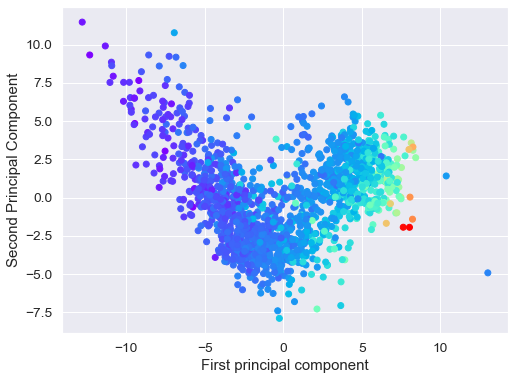

In [227]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df5['SalePrice'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [228]:
pca.components_

array([[ 0.06694535,  0.03655682,  0.1905293 , ..., -0.00692058,
        -0.04318095,  0.09591156],
       [-0.06563582, -0.08120174,  0.04707754, ..., -0.01420795,
        -0.0730631 ,  0.09815132],
       [ 0.06823015,  0.06156686, -0.01000377, ..., -0.00804862,
        -0.02877232,  0.02129569],
       ...,
       [-0.03538526, -0.03013871,  0.00755991, ..., -0.09555489,
         0.00296371, -0.04042605],
       [ 0.05438969,  0.04728   ,  0.07301392, ...,  0.04390315,
        -0.03129152, -0.03707458],
       [ 0.05589433, -0.01989155, -0.04862967, ..., -0.0325089 ,
         0.04169749,  0.02746259]])

In [229]:
df5.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [232]:
# PCA
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
df5=df.copy()
predictors = [s for s in df5.columns if s not in excludeColumns]
y3 = df5[outcome]
x3=pd.get_dummies(df5[predictors],drop_first=True)

scaler = StandardScaler()
train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)
scaler.fit(x3)

x3 = scaler.transform(x3)

pca = PCA(.95)
pca.fit(x3)

pca.n_components_

x3 = pca.transform(x3)

In [ ]:
x3.shape()

In [233]:
# Random Forest Regressor with 10-fold cross validation
rfr_pred = cross_val_predict(RandomForestRegressor(), x3, y3, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(rfr_pred))),2))

C:\Users\John\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Gradient Boosting Regressor with 10-fold cross validation
gbr_pred = cross_val_predict(GradientBoostingRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(gbr_pred))),2))

In [ ]:
#XGB Regressor with 10-fold cross validation
xgb_pred = cross_val_predict(XGBRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(xgb_pred))),2))

In [ ]:
#Cat Boost Regressor with 10-fold cross validation
ctc_pred = cross_val_predict(CatBoostRegressor(), x5, y5, cv=10)
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(np.exp(y5), np.exp(ctc_pred))),2))

# Parameter optimization

In [ ]:
#
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(train_X, train_y)
m_random.best_params_

In [ ]:
train_x3, valid_X3, train_y3, valid_y3 = train_test_split(x3, y3, test_size=0.3, random_state=1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestRegressor(), hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_x3, train_y3)
m_random.best_params_


In [ ]:
scores = cross_val_score(RandomForestRegressor(), x3, y3, cv=10, scoring='neg_mean_squared_error')
print('Root Mean Squared Log Error: ', [f'{acc:.3f}' for acc in scores])
print('Root Mean Squared Log Error:', scores.mean())

In [ ]:
regressionSummary(valid_y, predictions)

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(RandomForestRegressor(), x, y, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print('Accuracy:', scores.mean())

In [ ]:
#stacking model
models = [MLPRegressor(**grid_parm_mlp), RandomForestRegressor(**grid_parm_rfc), DecisionTreeRegressor(**grid_parm)]
      
S_Train, S_Test = stacking(models, train_X, train_y, valid_X, regression=True, verbose=2)
model = RandomForestRegressor()  
model = model.fit(S_Train, y_train)
model_pred = model.predict(S_Test)

# 